# **Milestone 1**

### **Context:**

PROJECT BACKGROUND: 
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past few years and is now larger than the new car market. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car owners replace their old vehicles with pre-owned cars instead of buying a new automobile.

Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), the used car market is a very different beast, with large uncertainties in both pricing and supply. Several factors, including mileage, brand, model, year, etc. can influence the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

BUSINESS CONTEXT: 
Cars4U, a tech startup in India, want to sell software to used car dealerships in a B2B business model.  They would like to also target a larger market, the end customer in a B2C model where end users could use the price predictor model to negotiate with car sellers (a fremium model with upsell for more functionality; advertisement revenue) - but this is their future market strategy.  Firstly, their initial target market will be used car sellers where the value proposition is to provide a more accurate understanding of the price of a used car beyond the traditional make, model, year. Based on this information, the dealership can decide to add a premium on top of the given price to the customer; they can also opt to reject any car that they get from auction if the price is too high.  For this, they are using historical data that contains other variables such as number of previous owner, the transmission types, etc. (see Data Dictionary).  They intend to use this information to create a machine learning model to first prove their hypothesis that other factors do indeed play a role in the price of a used car.  They can then productize the model in the form of an app that can be deployed and that will provide an easy to use interface for query and results.  The app itself may have other features such as history of similar cars sold in the region, etc. but first they have to see if their hunch is correct. 

### **The objective:**

Determine an accurate pricing model that will effectively predict the selling price of used cars in order to enable Cars4U to sell software that will allow its customers to devise profitable revenue strategies using differential pricing in the Indian market.

### **The key questions:**

1. The most important question is related to determining what are the key factors affecting the selling price of a used car.  We need to examine every independent variable and make this determination.  In the case where domain knowledge is required, we will use Google.

2. How confident are we in our findings? 

3. Can we justify our assumptions?

4. Can we justify our findings?

5. How will we ensure the accuracy of our chosen model?


### **The problem formulation**:

Create an accuracte and defensible supervised machine learning model that will provide an accurate selling price for a used car based on the features provided in the data dictionary. 

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [1]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

# To get visualization on missing values
#!pip install missingno
import missingno as msno

### **Let us load the data**

In [2]:
df = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights: _____**

The price of the car indicated by the variable Price and is the target variable. The rest of the variables are independent variables on which we will predict the price of the car.  There are NaNs in the database, especially in the New_price and Price columns. I also understand what Owner Type means now:  whether this is the first, second, third, etc owner of the car.  This is actually valuable information.  For example, if a car has changed hands several times during a short period of time, it may indicate a problem with the car. Serial number seems to be a unique identifier for each car, but since we are not looking for indiviual cars but categories, this column may be unnecessary - to be determined.


### **Let us check the data types and and missing values of each column** 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
#count of unique values in features
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

In [7]:
# Check total number of missing values of each column. Hint: Use isnull() method
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights: _____**

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.  The 2 price columns have nulls.

We can also observe that there are a lot of missing values of New_price.  Price is high as well.  Engine, Power and Seats also have missing values, but it's not as bad.


In [8]:
# Remove S.No. column from data. Hint: Use inplace = True

df.drop(columns=['S.No.'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations and Insights: _____**

We can derive the following observations and insights:

1. For 'Year' variable, the distribution is likely to be roughly symmetric and unimodal, with a peak around 2013-2014 and a long tail towards both sides (older and newer years). This indicates that the majority of cars in the dataset were manufactured around 2013-2014, with relatively fewer cars manufactured in the earlier or later years.

2. For Kilometers_Driven, the max appears to be an outlier since it is highly unlikely that a vehicle has been driven for 6.5 million kilometers.  

3. For Mileage, the min cannot be 0.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

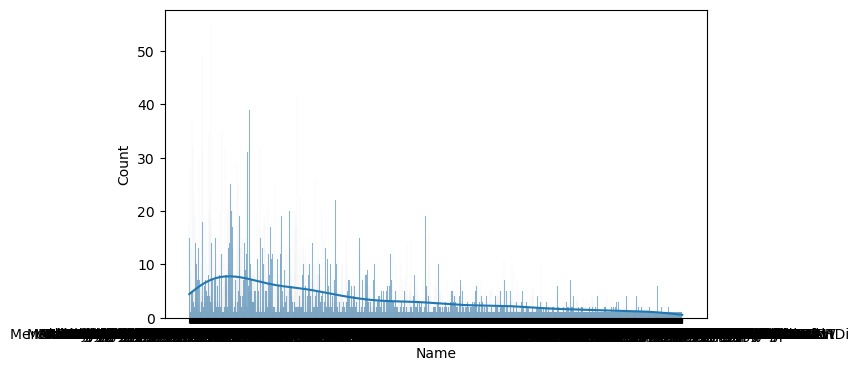

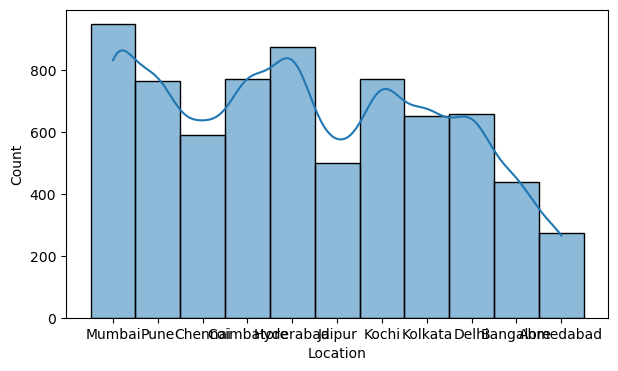

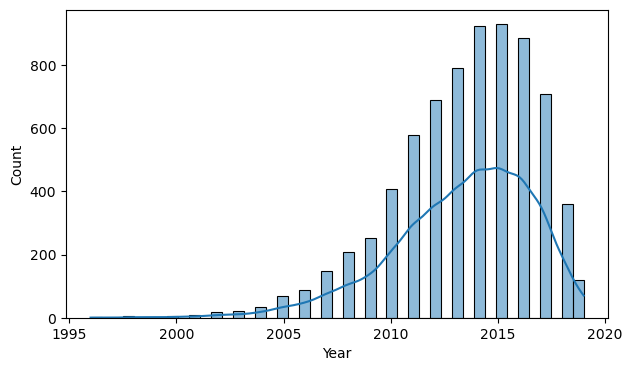

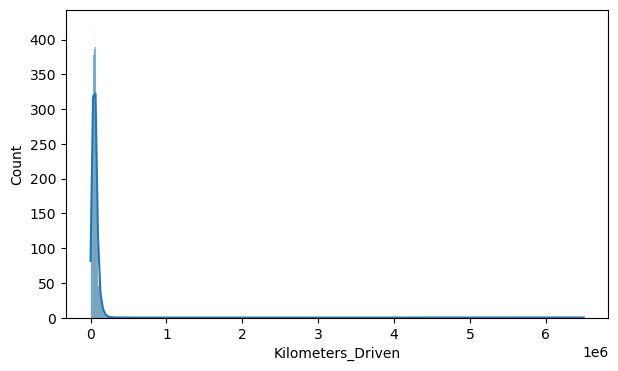

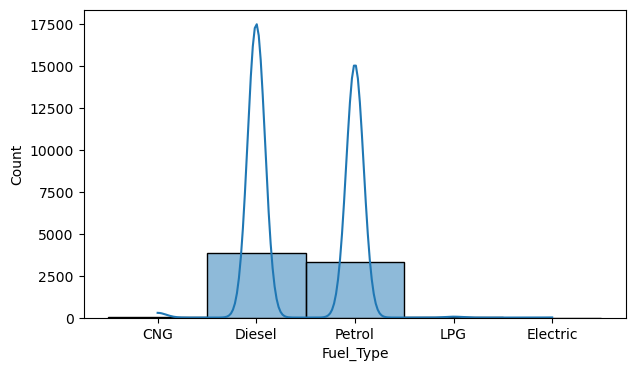

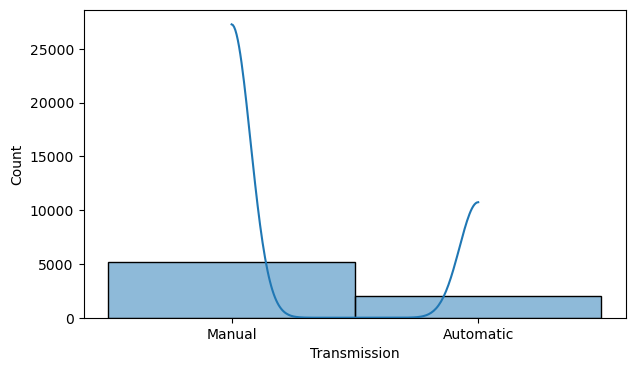

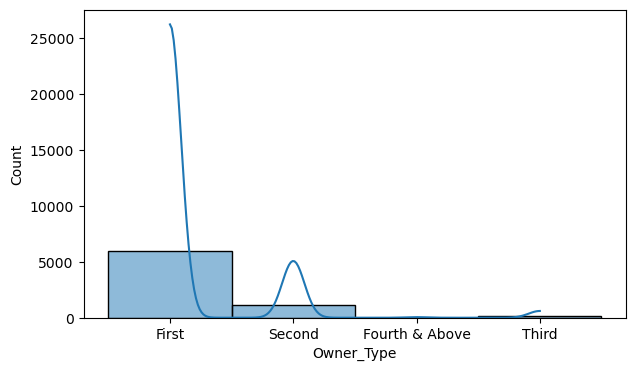

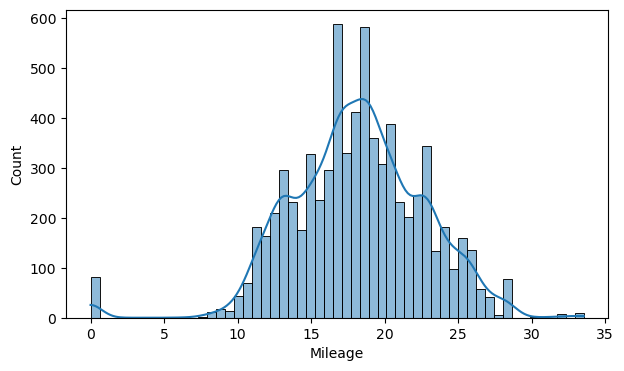

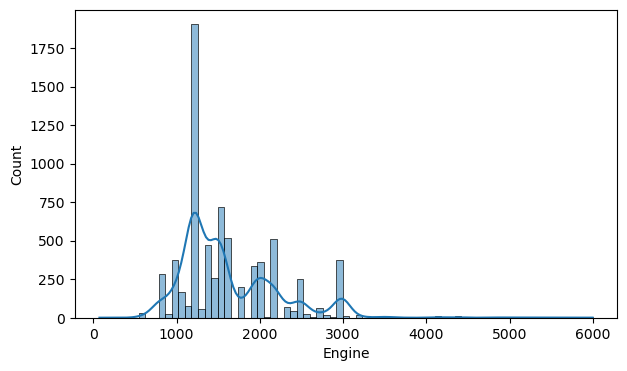

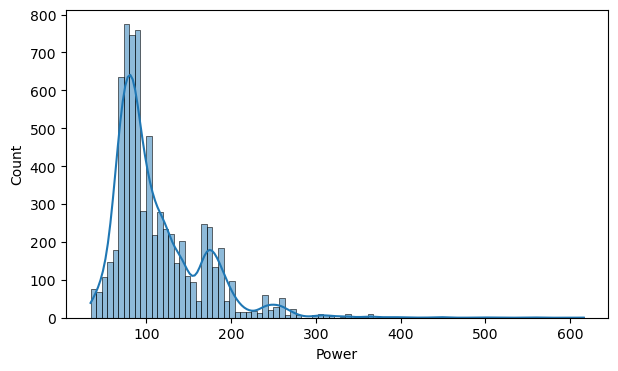

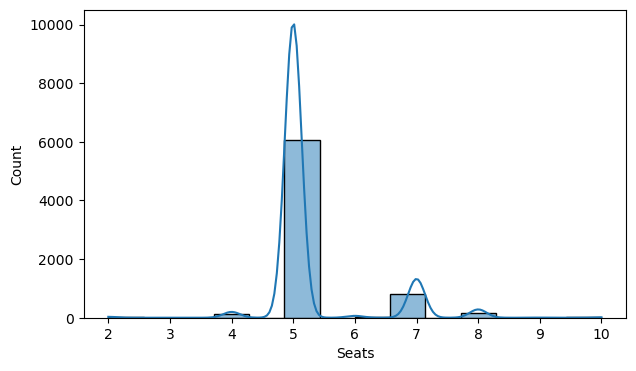

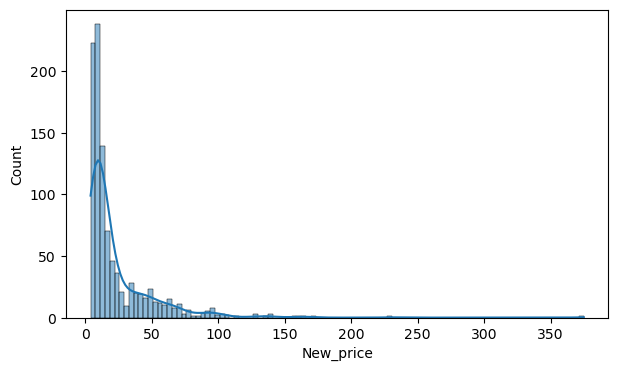

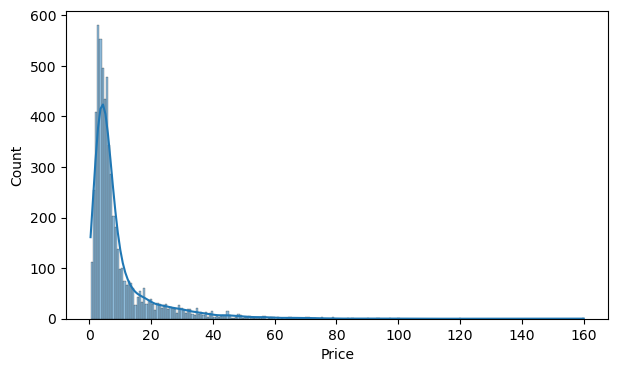

In [10]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    
    sns.histplot(data = df, x = i, kde = True)
    
    plt.show()

**Number of unique observations in each category**

In [11]:
cat_cols = df.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(df[column].value_counts())
    
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Typ

#### **Observations and Insights: _____**

1. Certain cars are more popular than others as indicated by Name.  However, the most popular car had only 55 entires out of a dataset of 7253 records.  Therefore, we are dealing with a large variety of cars.
2. Bigger cities have more cars.  Not unexpected. Mumbai has the most, followed by Hyderabad.
3. Most cars are Diesel or Petrol.
4. Manual cars are more popular than Automatic.
5. Most cars are first owner cars, meaning that most of the cars are being sold by the owner of the new car. 


**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [12]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
df.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: _____**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [13]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
df.drop(index=2328, inplace=True)

**Check Mileage extreme values**

In [14]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
df.sort_values('Mileage').head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [15]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

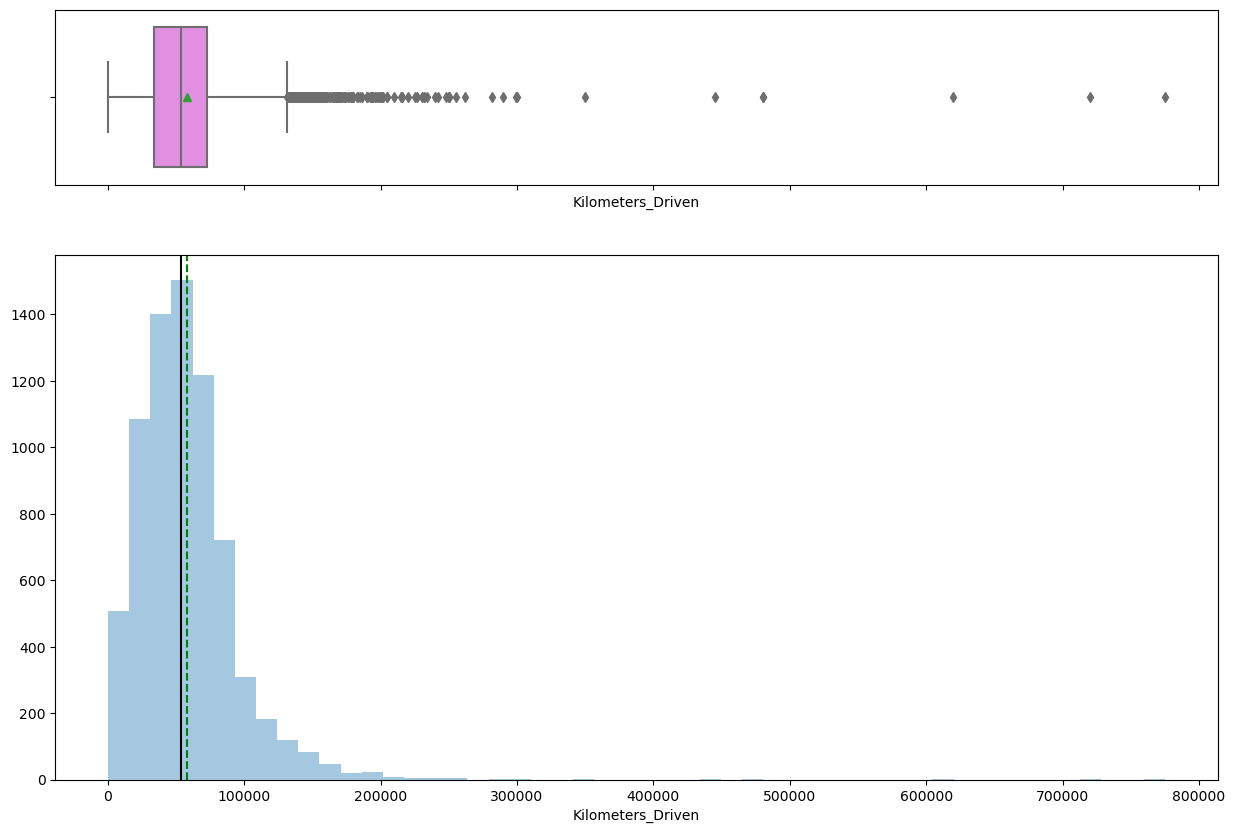

In [16]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(df['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

Log transformation can be used to reduce the skewness of a feature, in particular when the feature is highly right-skewed. Log transformation can make the distribution more symmetric and closer to a normal distribution. The log transformation can also make the data more interpretable as it can reduce the effect of outliers.

However, the right-skewed distribution can cause issues when building models because the model may be sensitive to the outliers present in the right tail. This can lead to overfitting or poor generalization performance of the model.

Furthermore, when data is skewed, it can also lead to inaccurate estimates of model parameters and a decrease in the power of statistical tests. Also, some algorithms such as linear and logistic regression assume that the data is normally distributed, and therefore, a skewed feature can lead to biased or inefficient estimates of the model parameters.

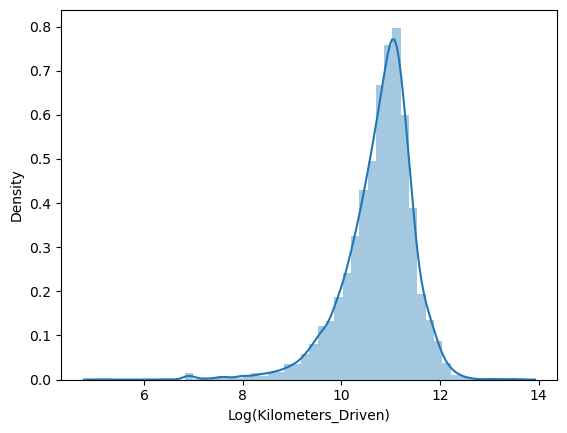

In [17]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(df["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights: _____**

This is better, but now shows a slight left-skewedness.

In [18]:
# We can add a transformed kilometers_driven feature in data
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

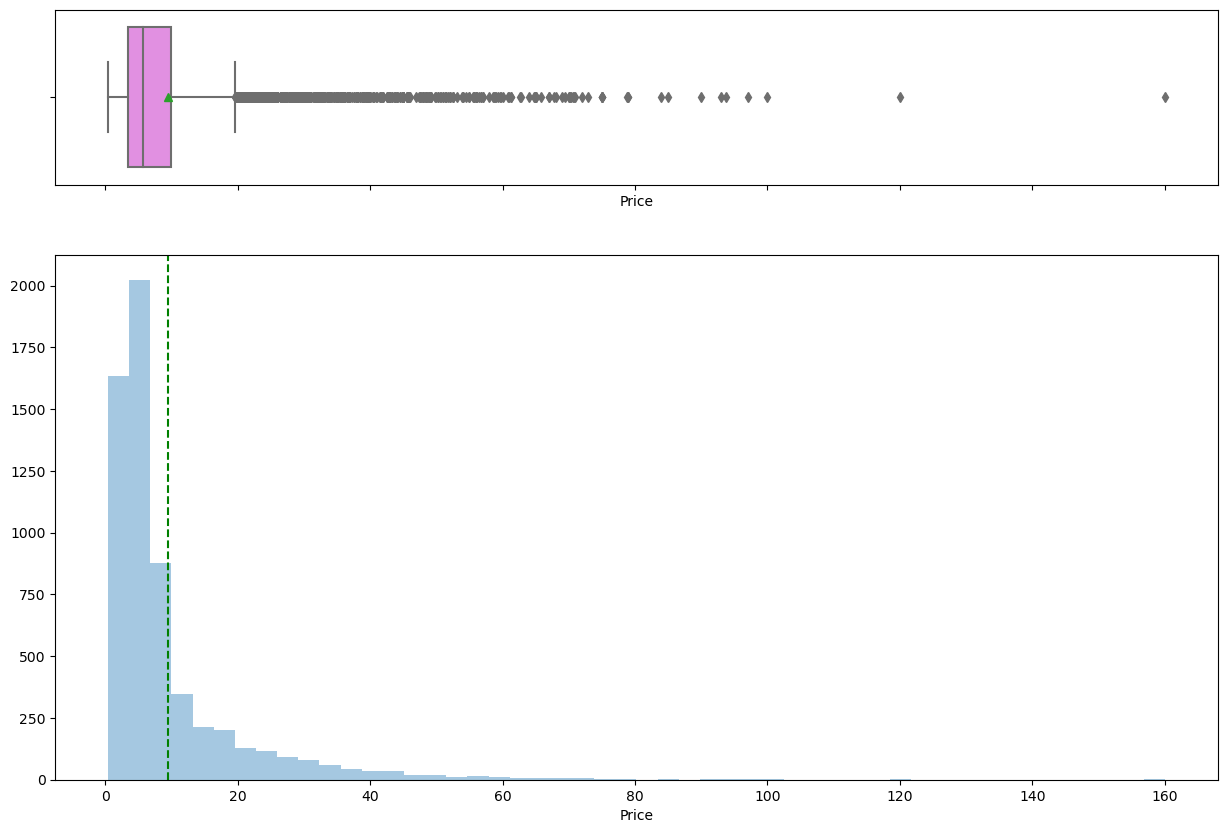

In [19]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(df['Price'])

<AxesSubplot:xlabel='Log(Price)', ylabel='Density'>

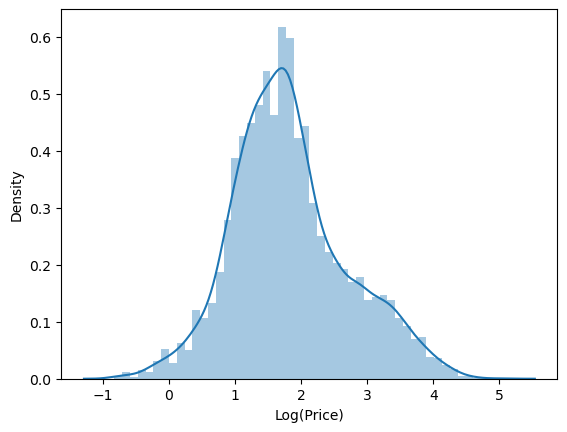

In [20]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(df["Price"]), axlabel = "Log(Price)")

In [21]:
# We can Add a transformed Price feature in data
df["price_log"] = np.log(df["Price"])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

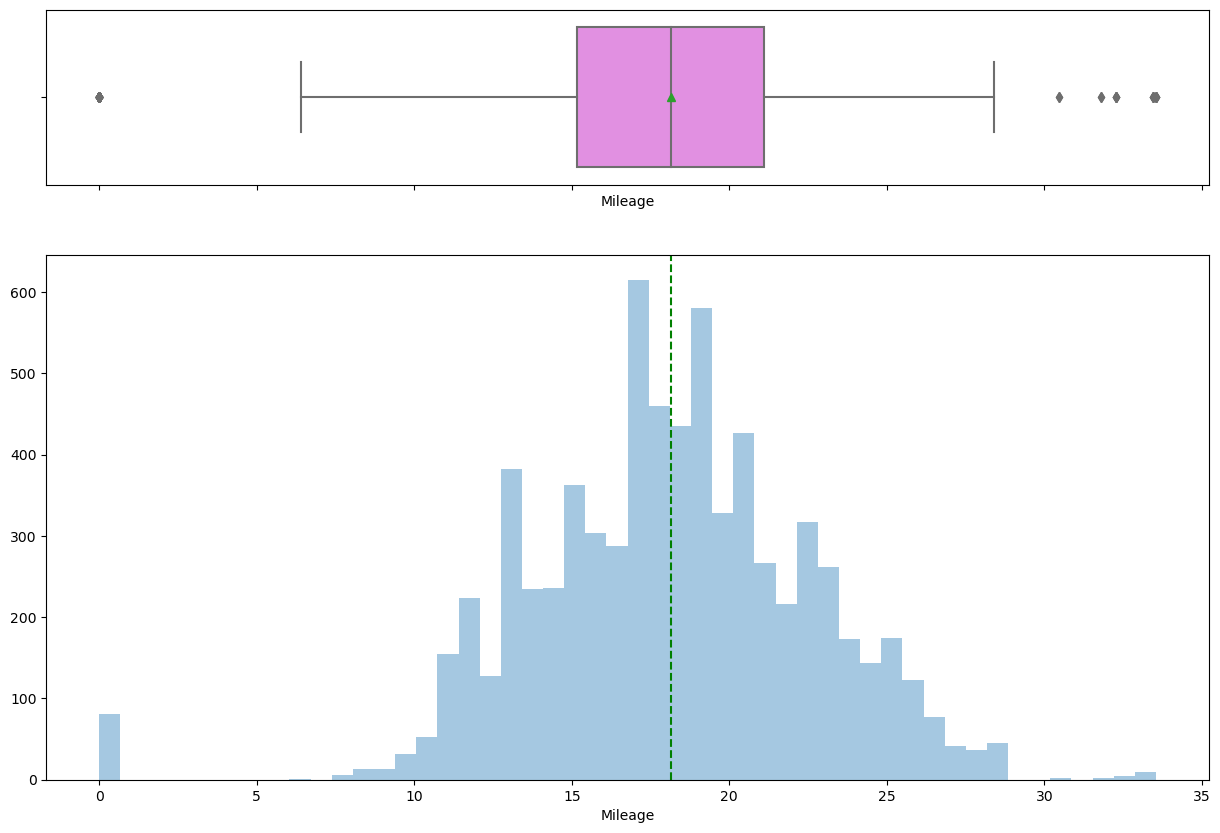

In [22]:
# Plot histogram and box-plot for 'Mileage'
histogram_boxplot(df['Mileage'])

In [23]:
# Log transformation of the feature 'Mileage'
#sns.distplot(np.log(df["Mileage"]), axlabel = "Log(Mileage)")
#this code results in error due to zeros in the dataset for Mileage

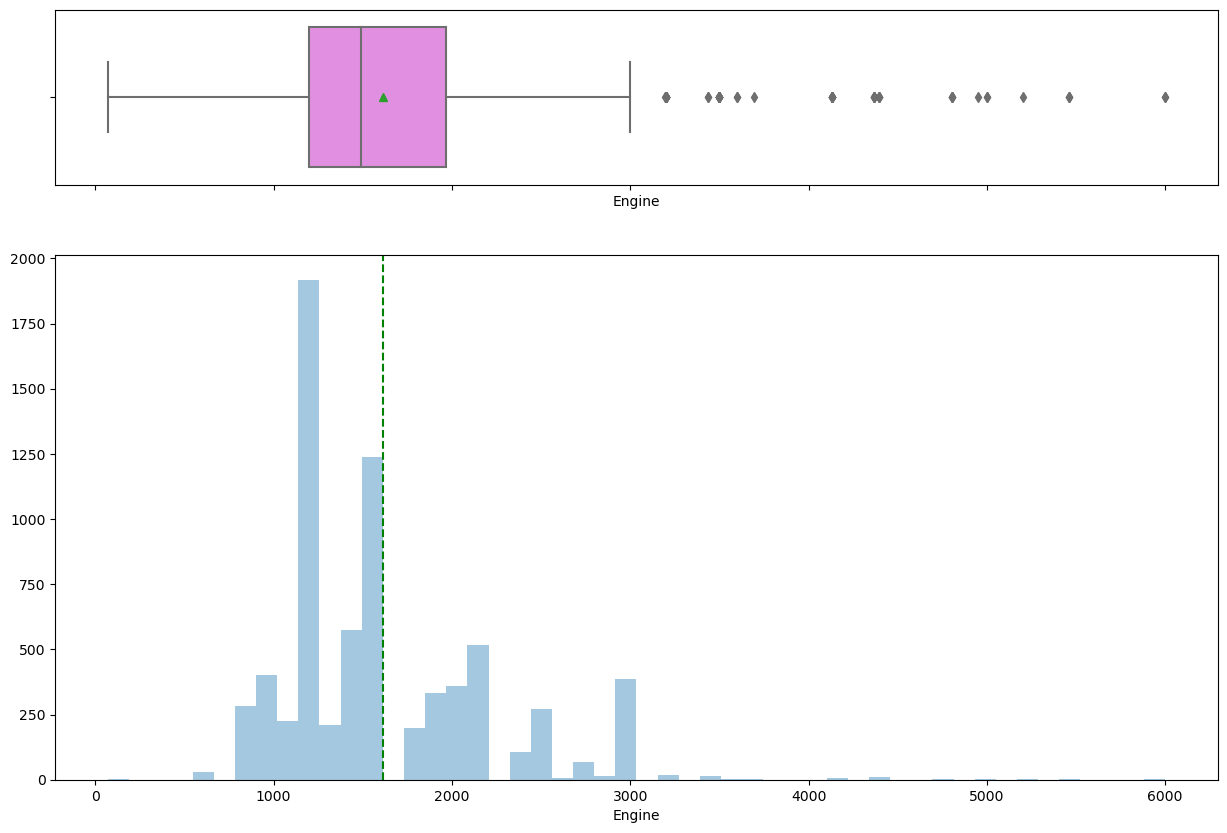

In [24]:
# Plot histogram and box-plot for 'Engine'
histogram_boxplot(df['Engine'])

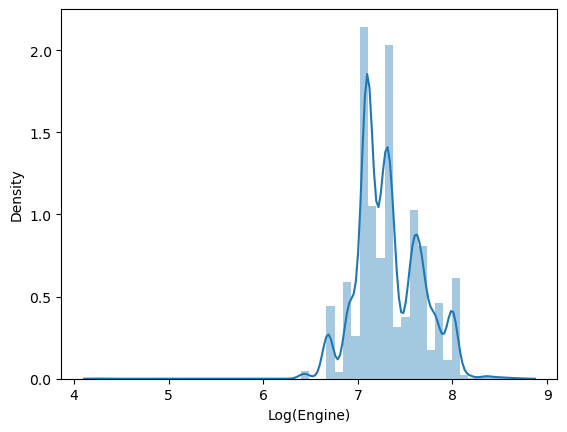

In [25]:
# Log transformation of the feature 'Engine'
sns.distplot(np.log(df["Engine"]), axlabel = "Log(Engine)");

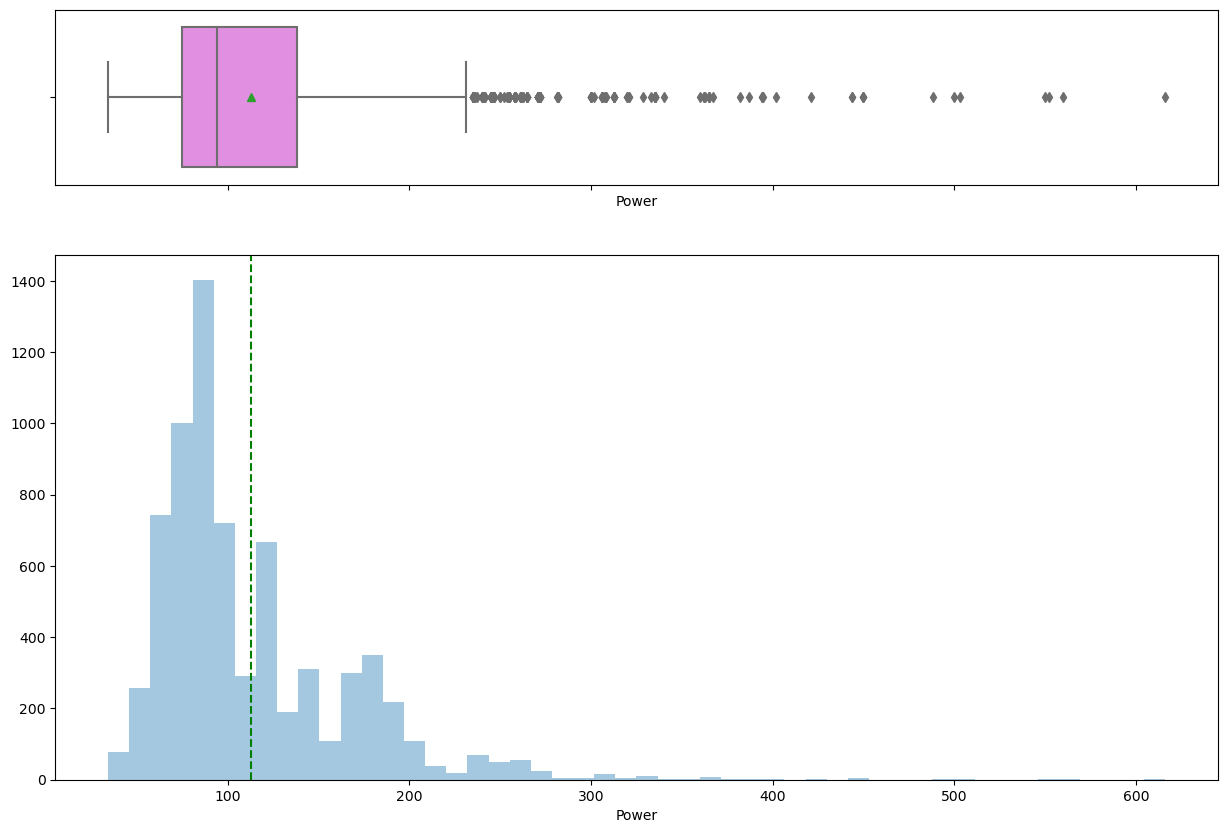

In [26]:
# Plot histogram and box-plot for 'Power'
histogram_boxplot(df['Power'])

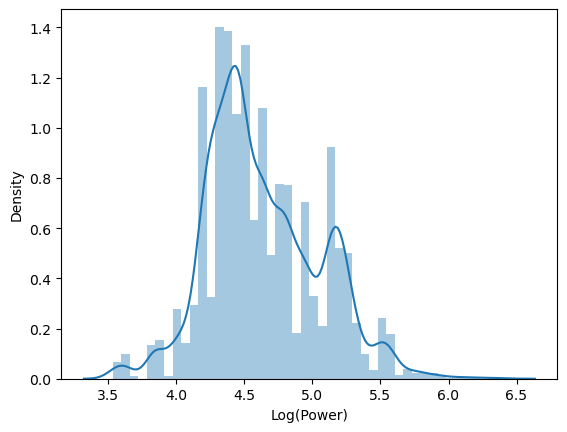

In [27]:
# Log transformation of the feature 'Power'
sns.distplot(np.log(df["Power"]), axlabel = "Log(Power)");

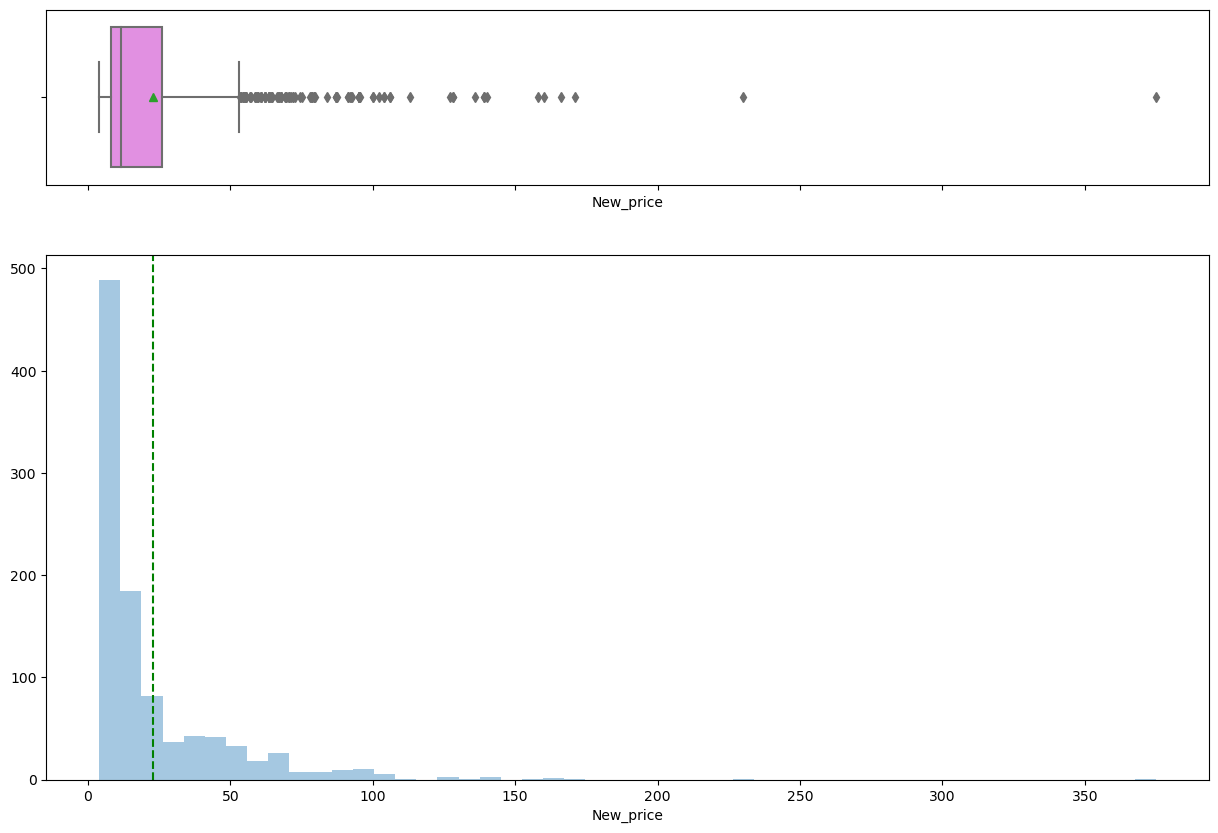

In [28]:
# Plot histogram and box-plot for 'New_price'
histogram_boxplot(df['New_price'])

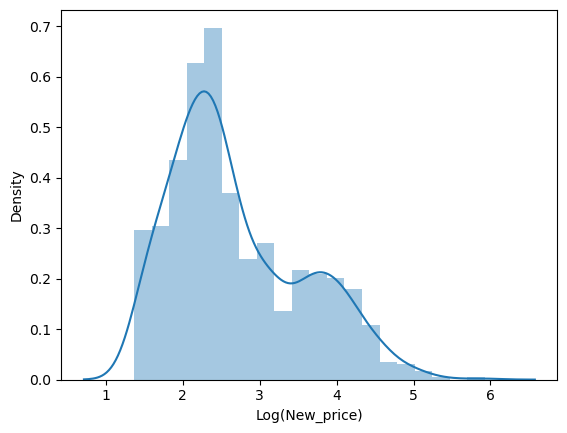

In [29]:
# Log transformation of the feature 'New_price'
sns.distplot(np.log(df["New_price"]), axlabel = "Log(New_price)");

In [30]:
# We can Add a transformed New_price feature in data
df["new_price_log"] = np.log(df["New_price"])

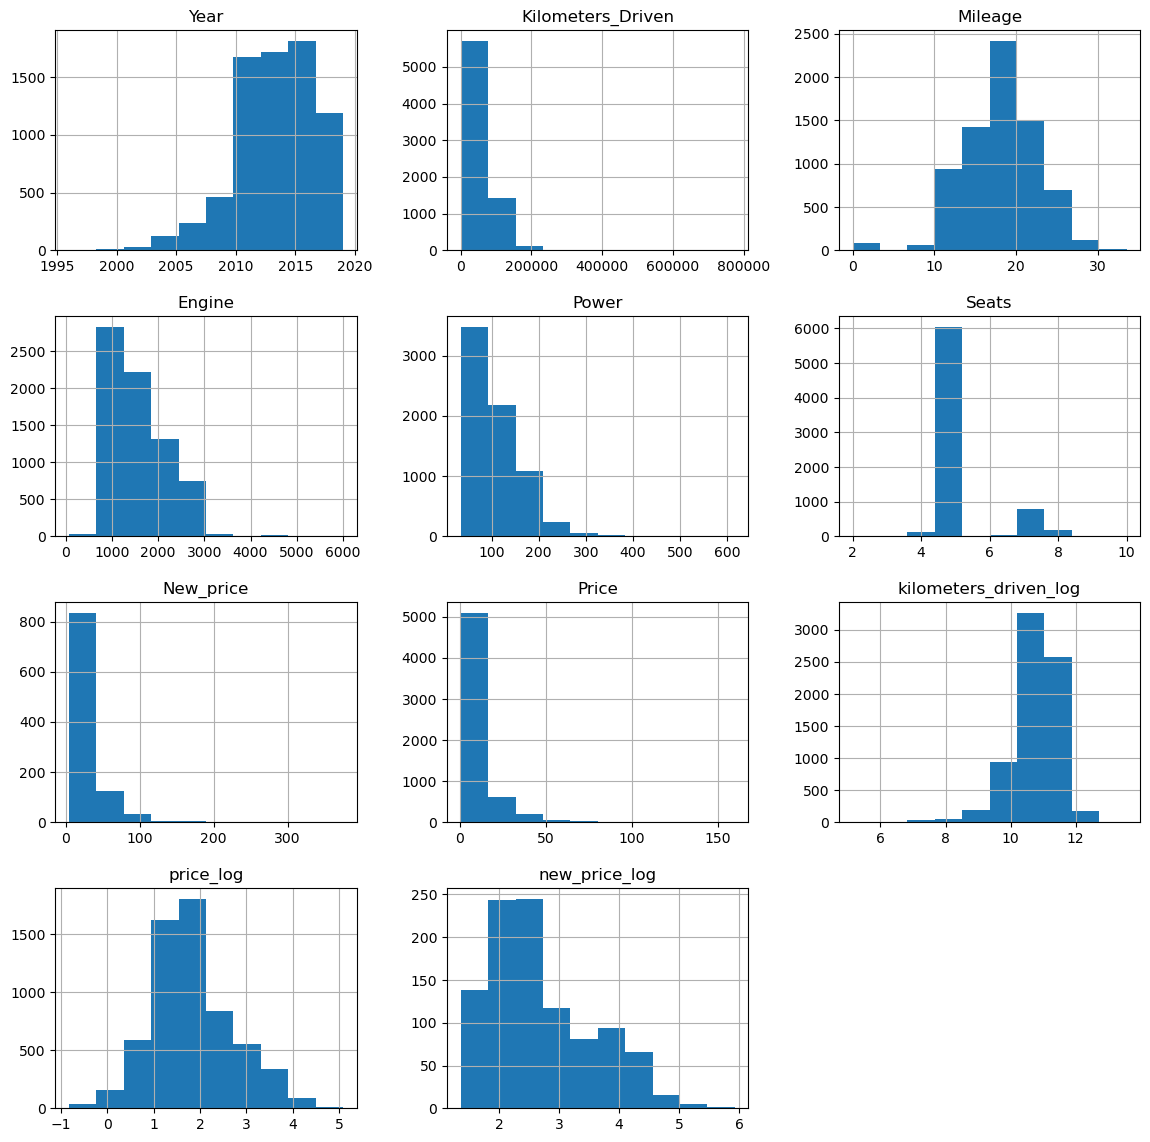

In [31]:
# Creating histograms
df.hist(figsize = (14, 14))

plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7252 non-null   object 
 1   Location               7252 non-null   object 
 2   Year                   7252 non-null   object 
 3   Kilometers_Driven      7252 non-null   int64  
 4   Fuel_Type              7252 non-null   object 
 5   Transmission           7252 non-null   object 
 6   Owner_Type             7252 non-null   object 
 7   Mileage                7250 non-null   float64
 8   Engine                 7206 non-null   float64
 9   Power                  7077 non-null   float64
 10  Seats                  7199 non-null   object 
 11  New_price              1006 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  7252 non-null   float64
 14  price_log              6018 non-null   float64
 15  new_

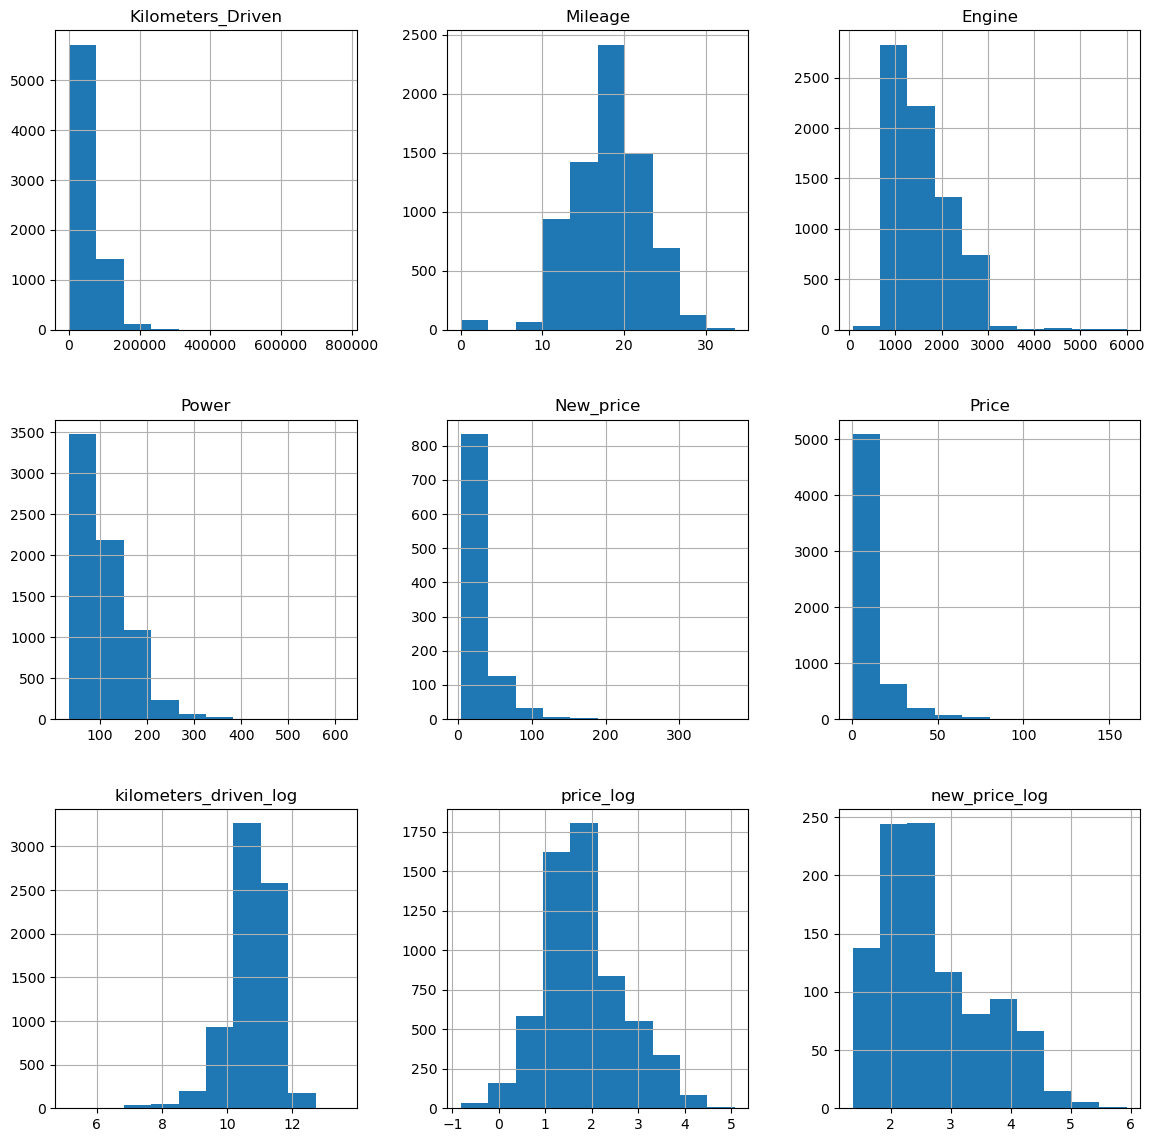

In [32]:
df['Year'] = df['Year'].astype('object')
df['Seats'] = df['Seats'].astype('object')

# Creating histograms
df.hist(figsize = (14, 14))

df.info()

plt.show()

**Observations and Insights for all the plots: _____**

1. Mileage is roughly left skewed, so we can transform. However, there are a lot of zeros which need to be cleared out first before we can do this.

2. --> Engine is multimodal.   Need to check how to handle this.

3. -->Power is bimodal.  Need to check how to handle this.

4. -->New_price is bimodal. Need to check how to handle this.

5. We are correct in transforming Price and Kilometers_Driven. 

6.  Year and Seats are a numerical variable.  It is better to convert them to object variables.

## **2. Univariate analysis - Categorical Data**

In [33]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(df[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(df[z], palette = 'Paired', order = df[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

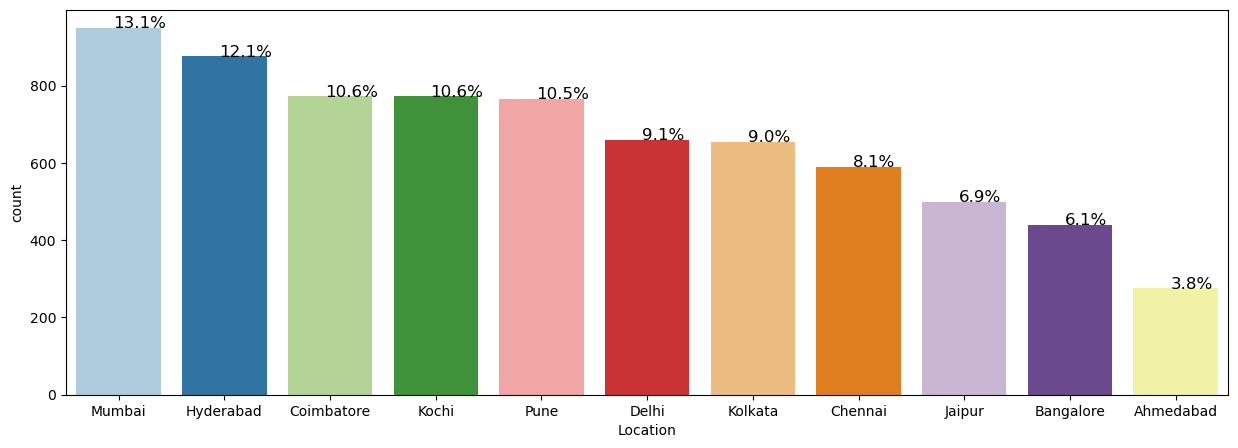

In [34]:
# Bar Plot for 'Location'
perc_on_bar('Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

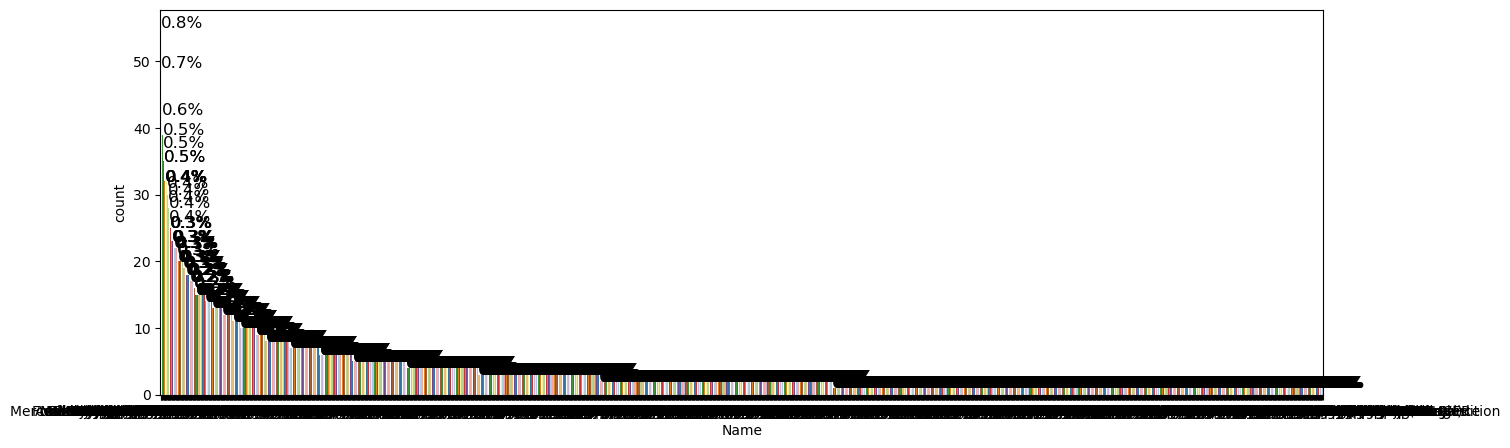

In [35]:
# Bar Plot for 'Name'
perc_on_bar('Name')

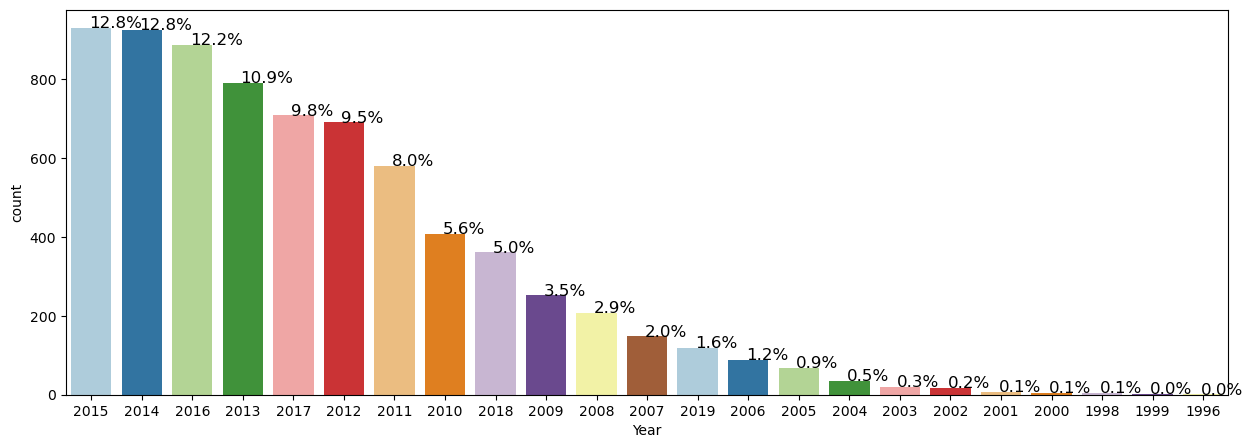

In [36]:
# Bar Plot for 'Year'
perc_on_bar('Year')

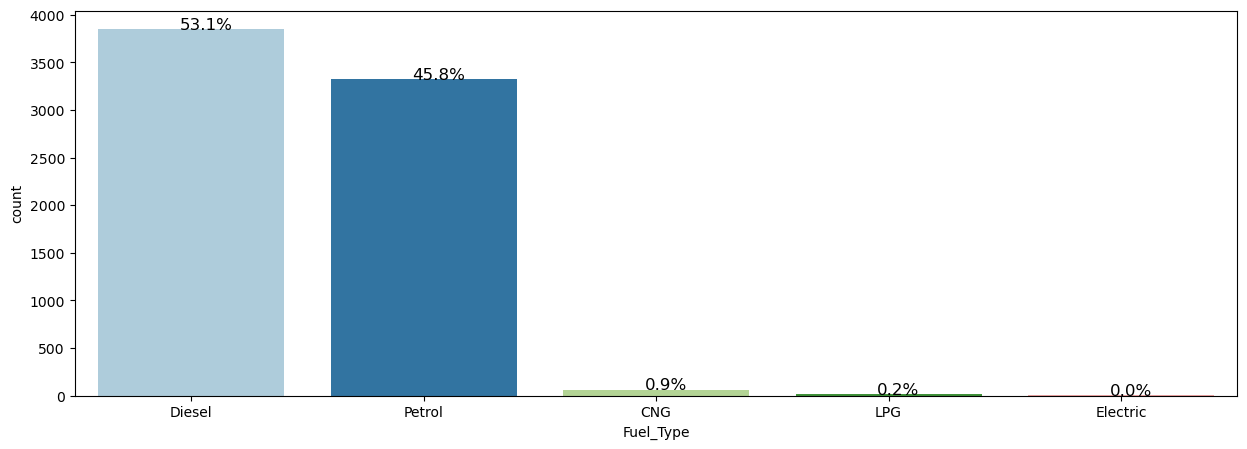

In [37]:
# Bar Plot for 'Fuel_Type'
perc_on_bar('Fuel_Type')

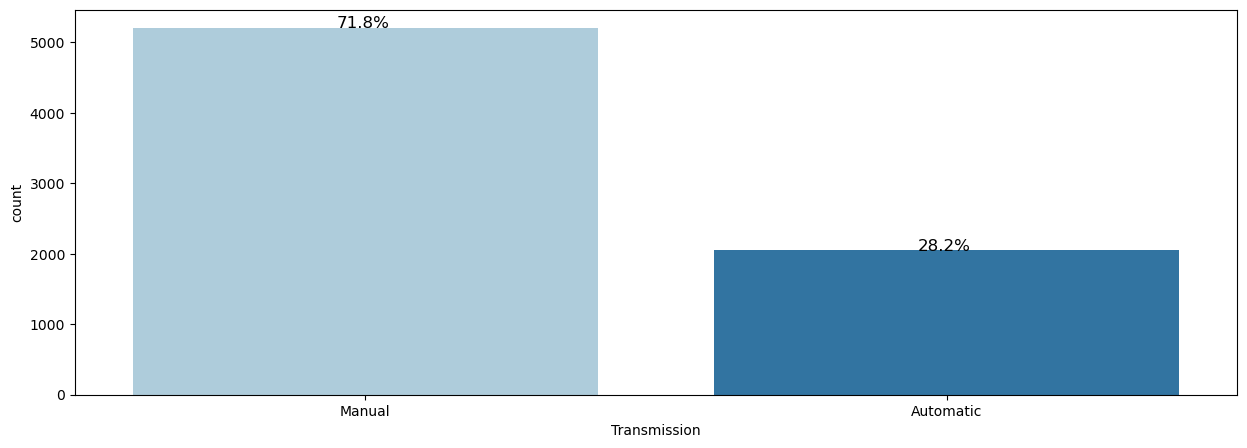

In [38]:
# Bar Plot for 'Transmission'
perc_on_bar('Transmission')

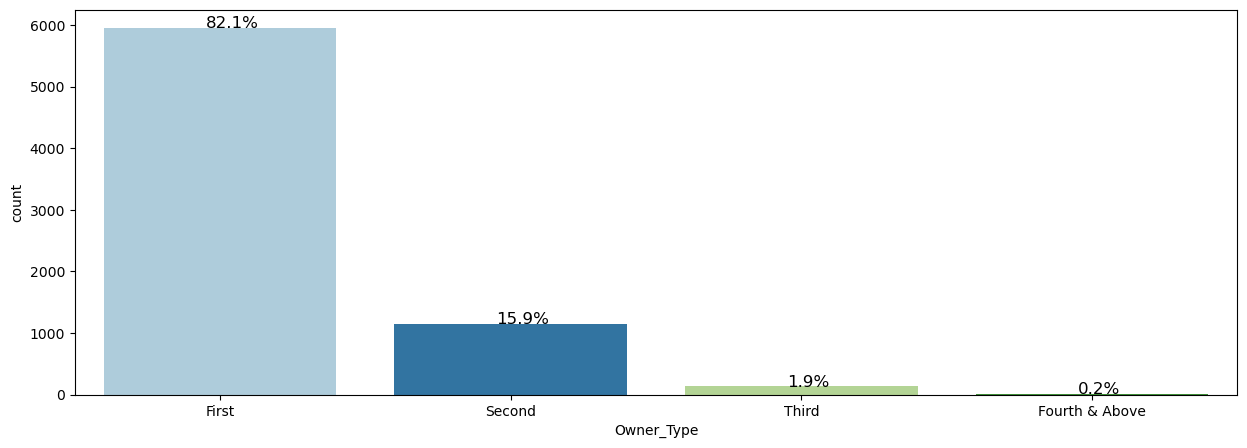

In [39]:
# Bar Plot for 'Owner_Type'
perc_on_bar('Owner_Type')

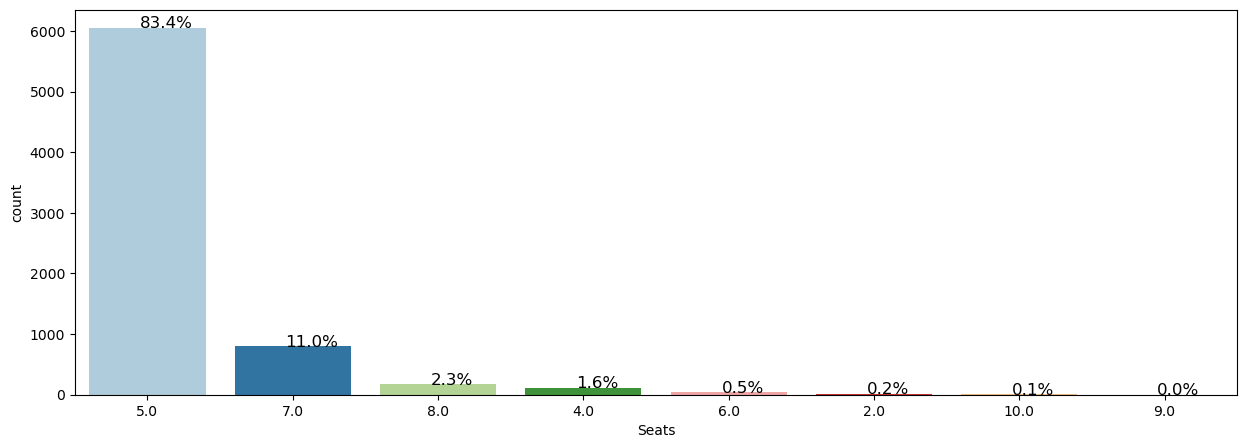

In [40]:
# Bar Plot for 'Seats'
perc_on_bar('Seats')

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7252 non-null   object 
 1   Location               7252 non-null   object 
 2   Year                   7252 non-null   object 
 3   Kilometers_Driven      7252 non-null   int64  
 4   Fuel_Type              7252 non-null   object 
 5   Transmission           7252 non-null   object 
 6   Owner_Type             7252 non-null   object 
 7   Mileage                7250 non-null   float64
 8   Engine                 7206 non-null   float64
 9   Power                  7077 non-null   float64
 10  Seats                  7199 non-null   object 
 11  New_price              1006 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  7252 non-null   float64
 14  price_log              6018 non-null   float64
 15  new_

**Observations and Insights from all plots: _____**

1. Most cars in the dataset are sedans (5 seaters)

2. Most cars are sold by the original owner of the car

3. Most cars are Manual transmission

4. Diesel and petrol cars are roughly equal (with petrol cars being slighly lower)

5. There are older cars in dataset which is right skewed

6. Some brands are more popular than others, but there are a lot of brands for sale

7. Over 60% of the used cars sold are in Mumbai, Hyderabad, Coimbatore, Kochi and Pune.


For name, we need to eliminate the Name or transform it to categorial


## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='price_log'>

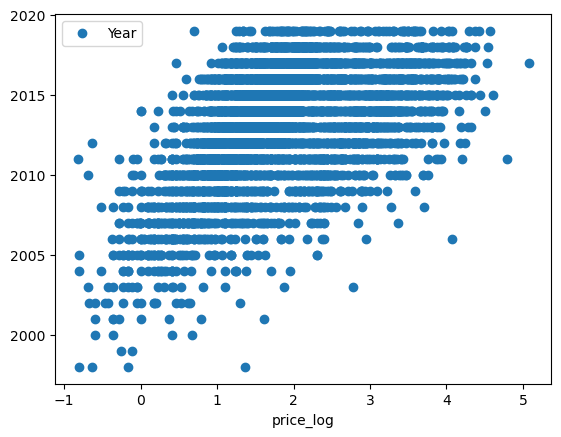

In [42]:
# Let us plot pair plot for the variables 'year' and 'price_log'
df.plot(x = 'price_log', y = 'Year', style = 'o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

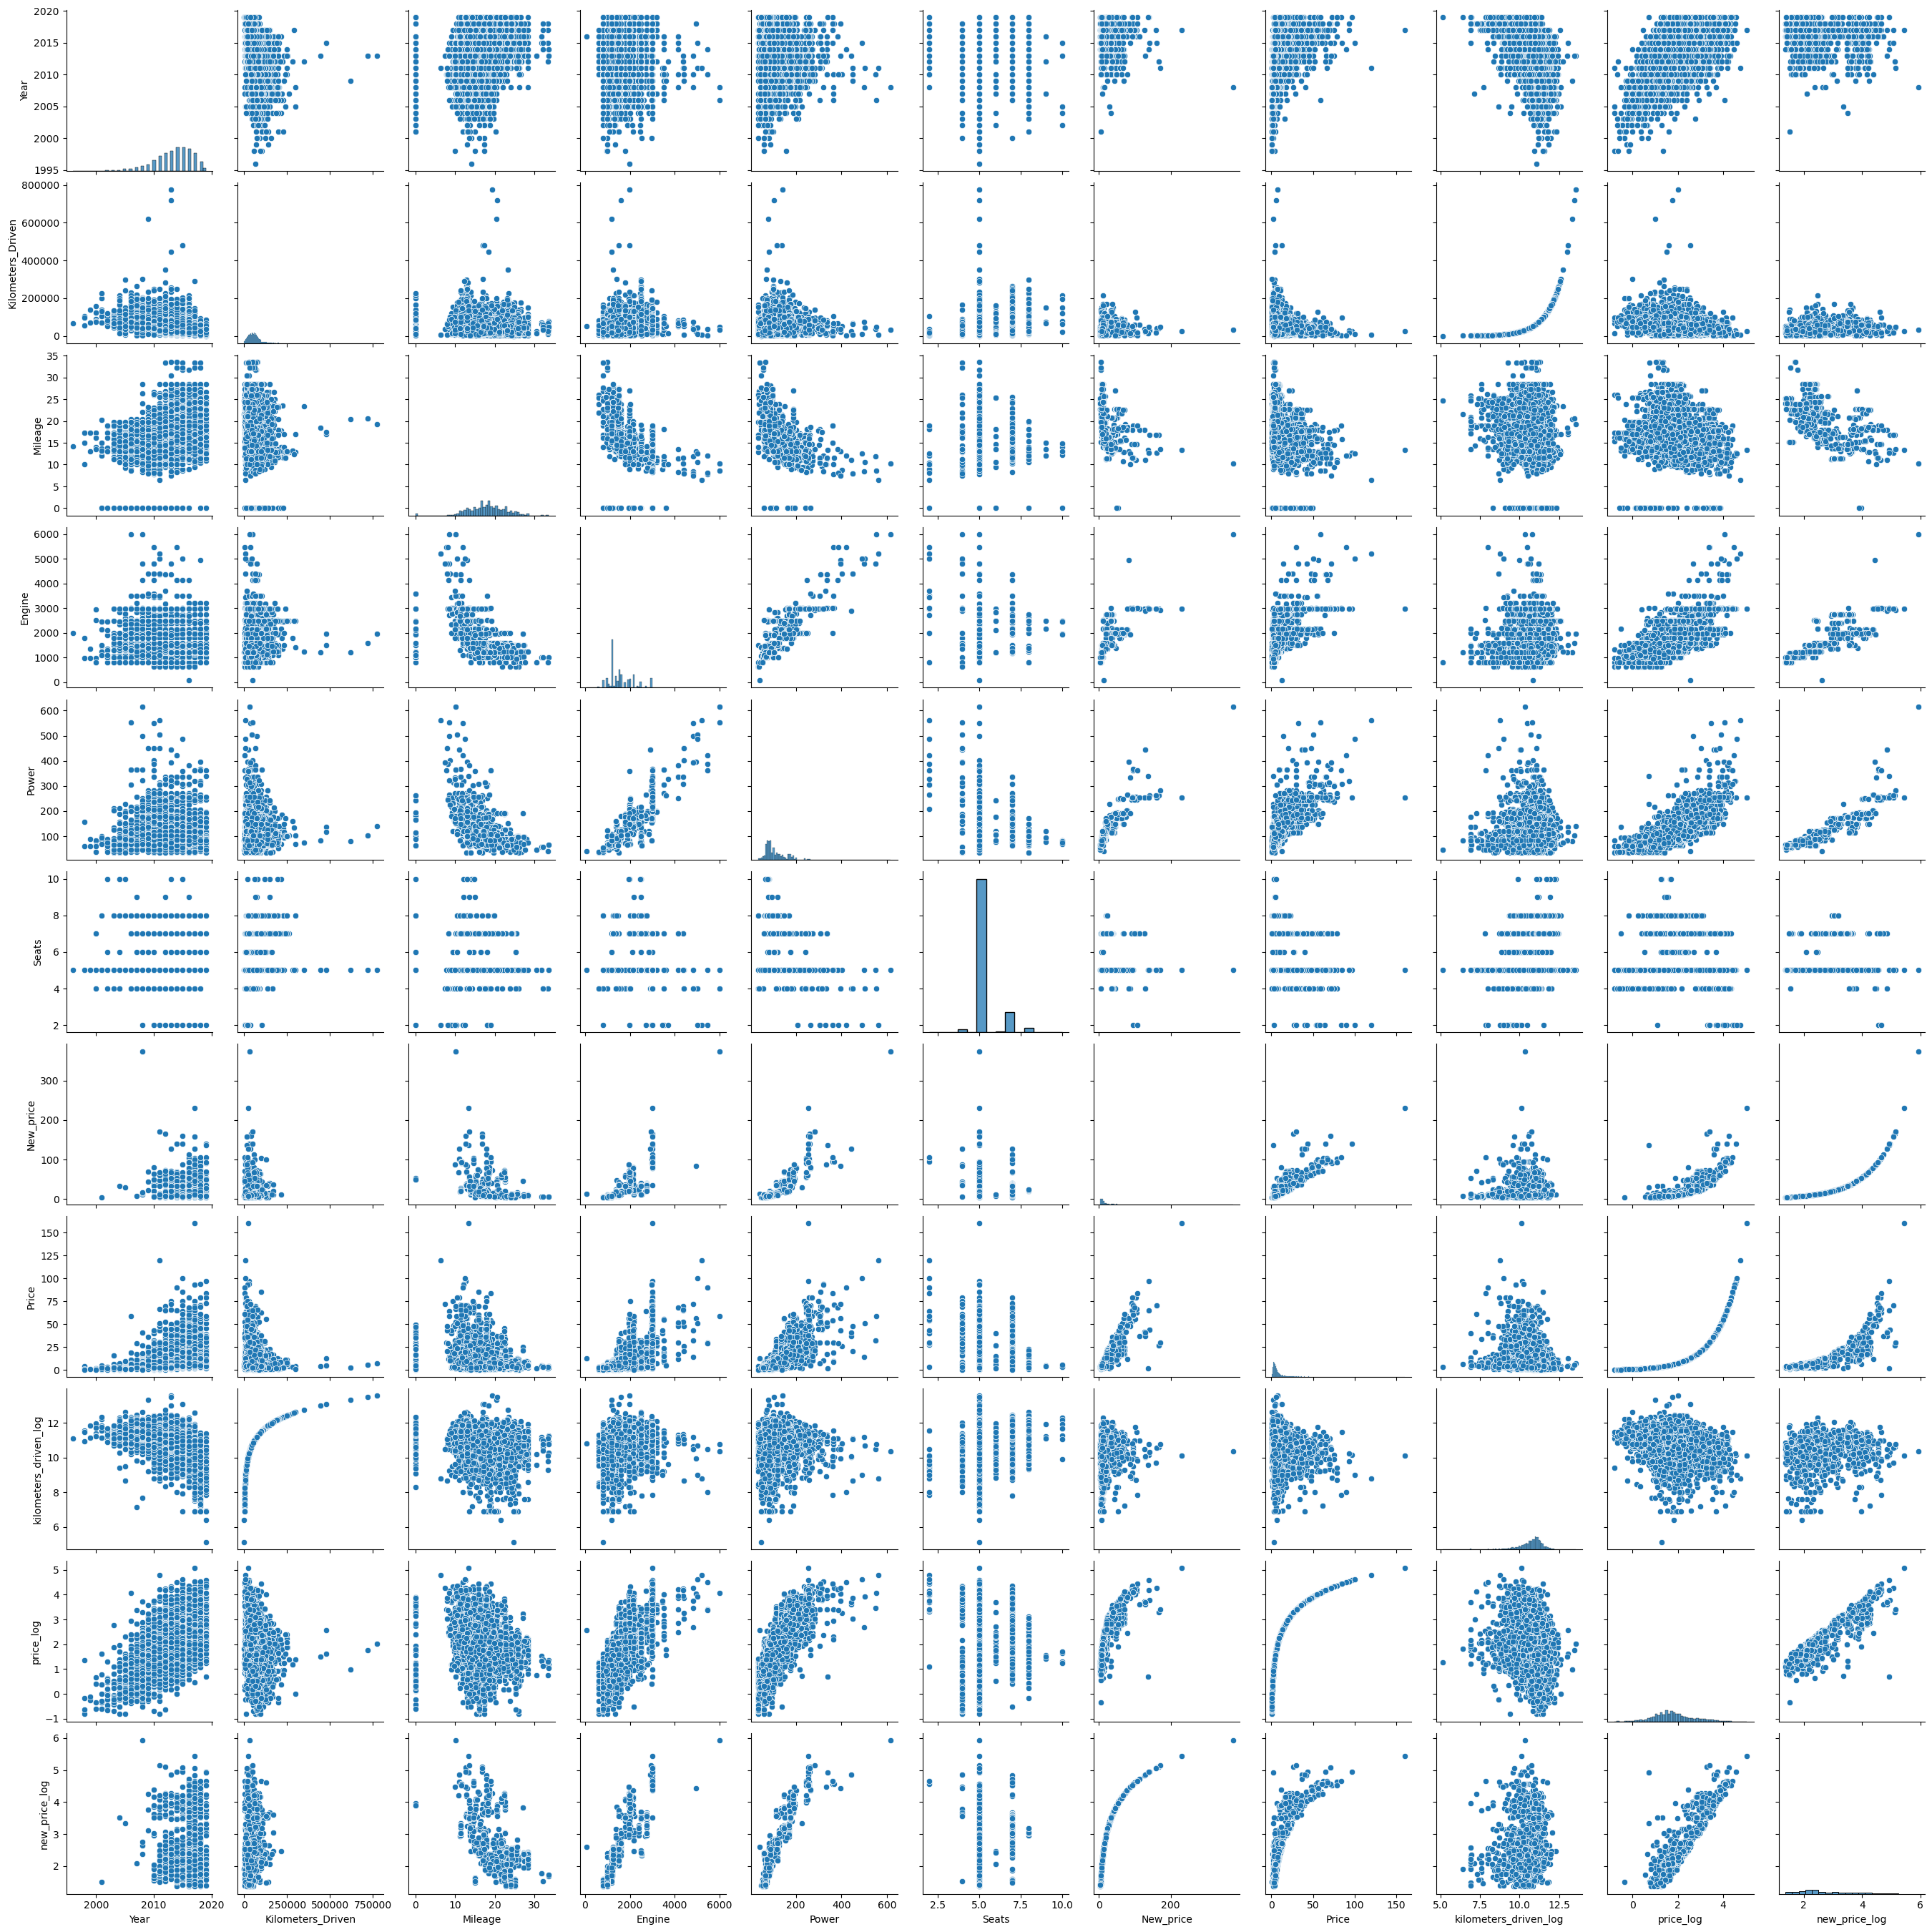

In [43]:
sns.pairplot(df)
#import matplotlib.pyplot as plt
plt.show()

**Observations and Insights from all plots: _____**

1. Price_log and Year shows a positive correlation
2. Year and Kilometers_driven_log has negative correlation.
3. Year and New_price shows a positive correlation
4. Power and Year show as positive correlation which is interesting.  Do newer cars have more Power?
5. Mileage and Price_log are negatively correlated
6. Mileage and Power are negatively correlated
7. Mileage and Engine are negatively correlated
8. Engine and Power are positively correlated
9. Engine and Kilometers_driven_log are negatively correlated
10. Power and Mileage are negatively correalated
11. Power and Price_log are positively correlated
12. Power and New_price are positively correlated

### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7252 non-null   object 
 1   Location               7252 non-null   object 
 2   Year                   7252 non-null   object 
 3   Kilometers_Driven      7252 non-null   int64  
 4   Fuel_Type              7252 non-null   object 
 5   Transmission           7252 non-null   object 
 6   Owner_Type             7252 non-null   object 
 7   Mileage                7250 non-null   float64
 8   Engine                 7206 non-null   float64
 9   Power                  7077 non-null   float64
 10  Seats                  7199 non-null   object 
 11  New_price              1006 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  7252 non-null   float64
 14  price_log              6018 non-null   float64
 15  new_

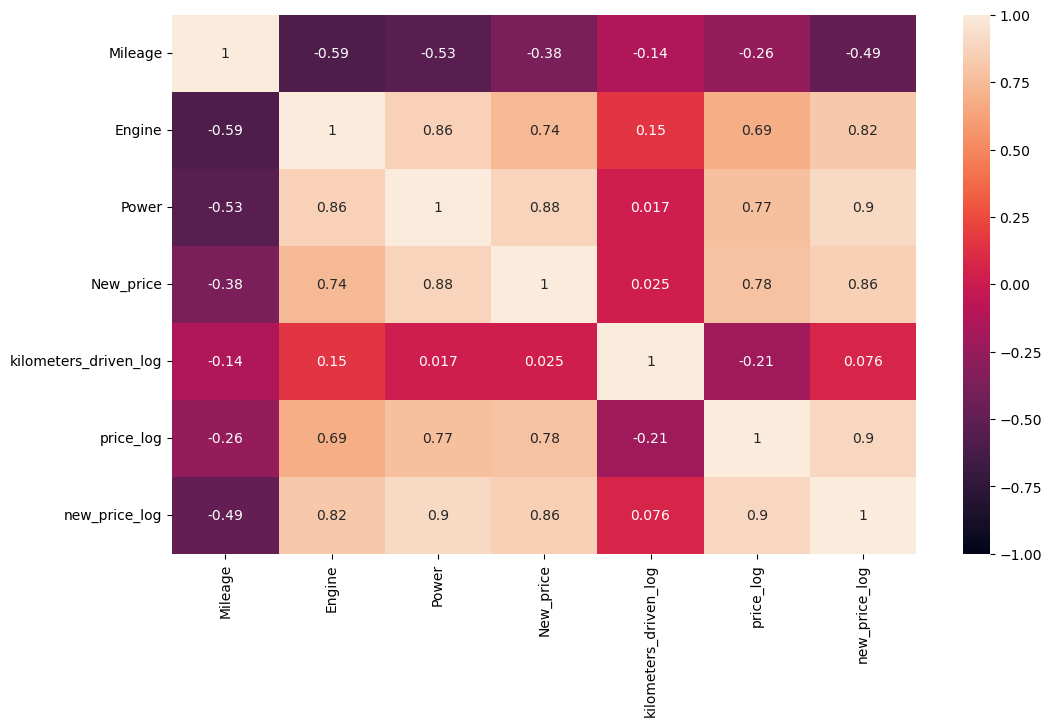

In [45]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))
sns.heatmap(df.drop(columns=['Kilometers_Driven','Price'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7252 non-null   object 
 1   Location               7252 non-null   object 
 2   Year                   7252 non-null   object 
 3   Kilometers_Driven      7252 non-null   int64  
 4   Fuel_Type              7252 non-null   object 
 5   Transmission           7252 non-null   object 
 6   Owner_Type             7252 non-null   object 
 7   Mileage                7250 non-null   float64
 8   Engine                 7206 non-null   float64
 9   Power                  7077 non-null   float64
 10  Seats                  7199 non-null   object 
 11  New_price              1006 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  7252 non-null   float64
 14  price_log              6018 non-null   float64
 15  new_

**Observations and Insights: _____**

### **3. Box plot**

In [47]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = df['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = df['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

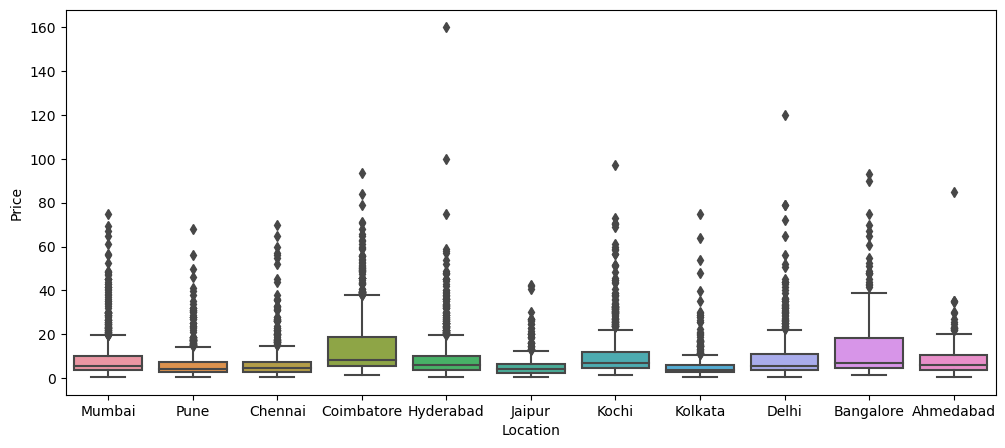

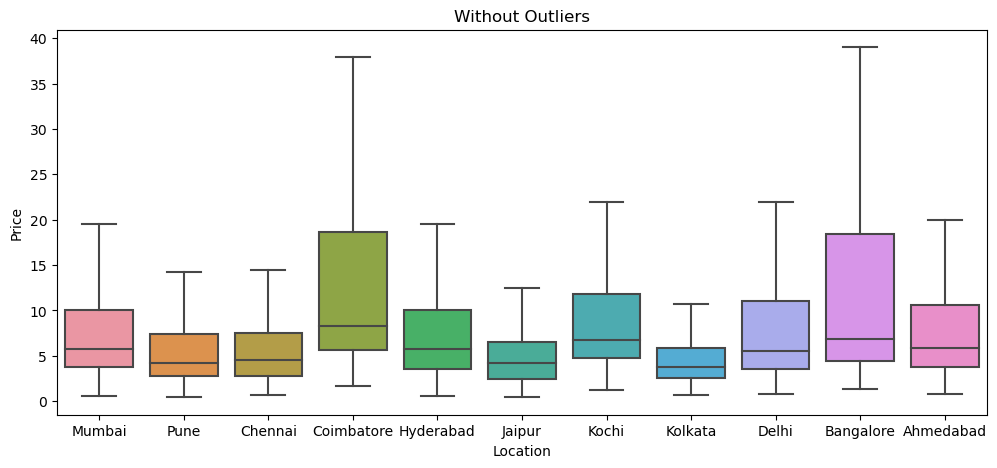

In [48]:
# Box Plot: Price vs Location
boxplot(df['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

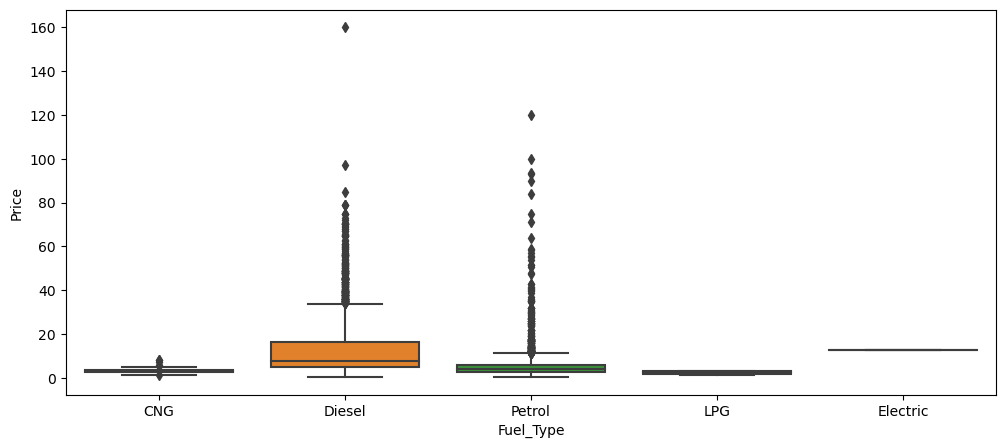

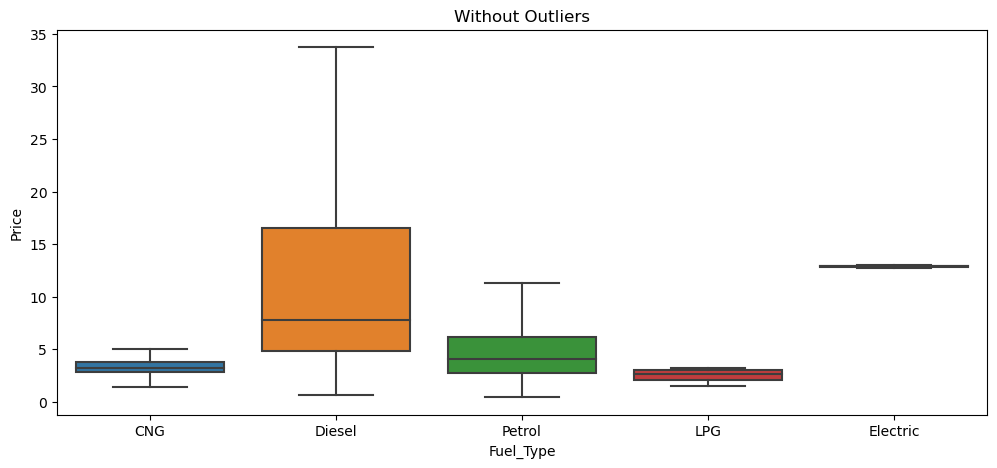

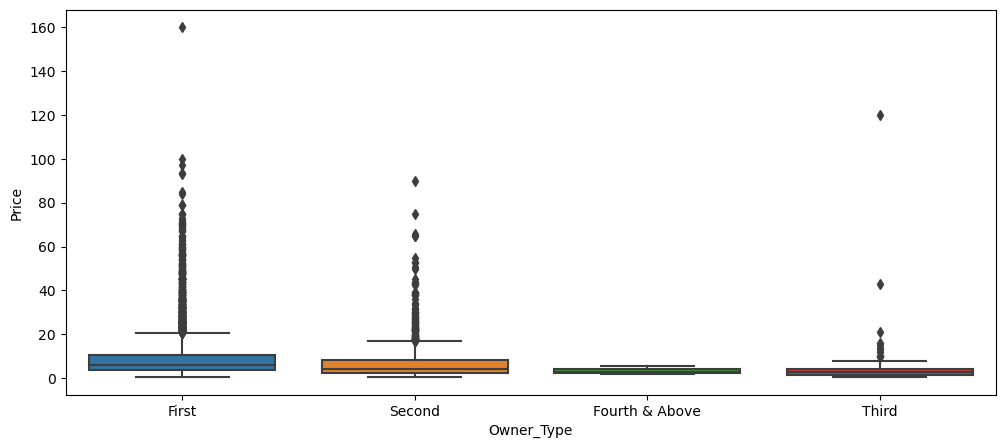

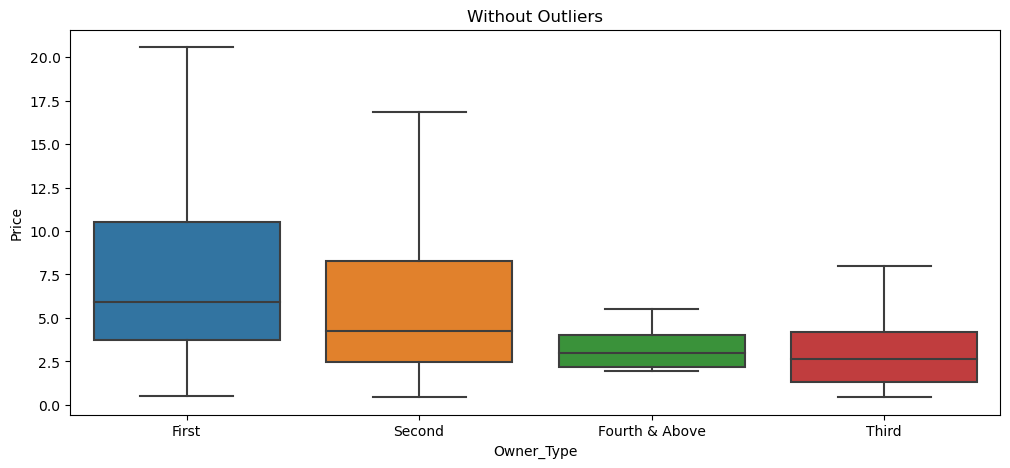

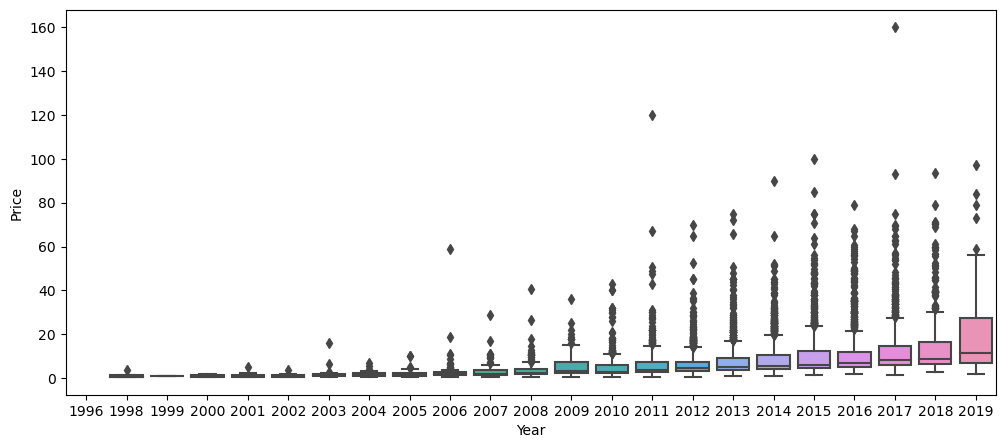

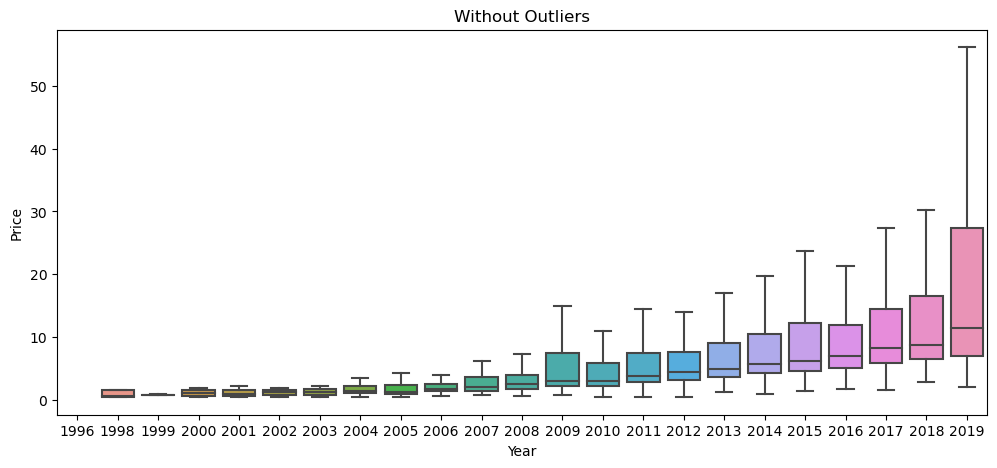

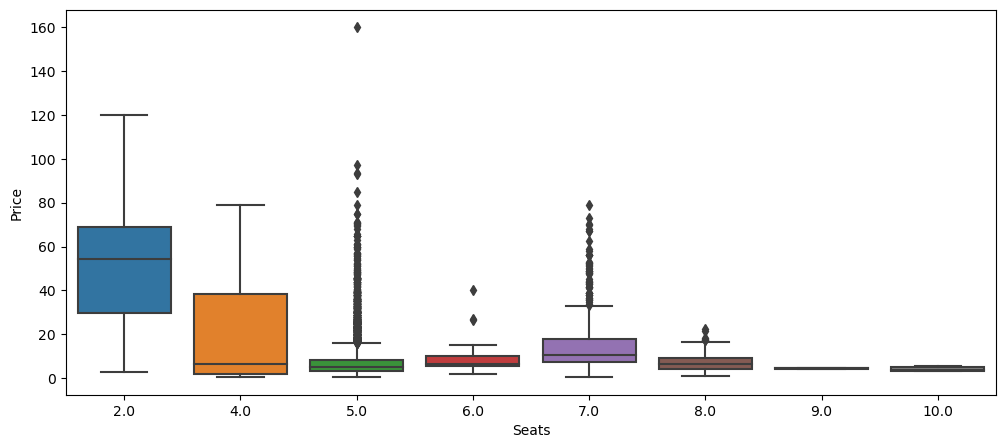

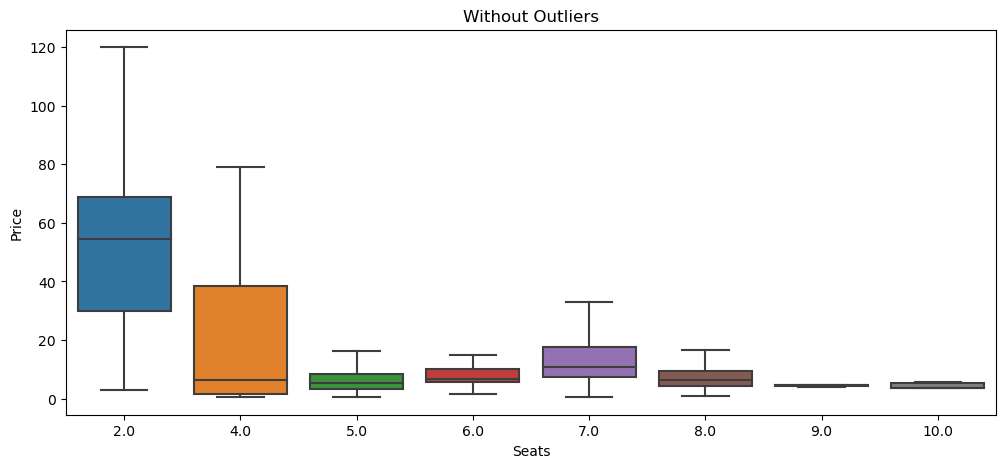

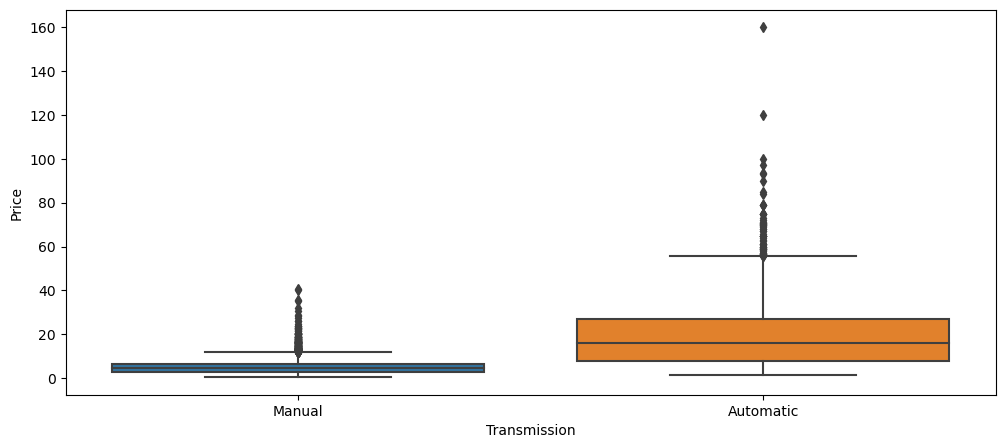

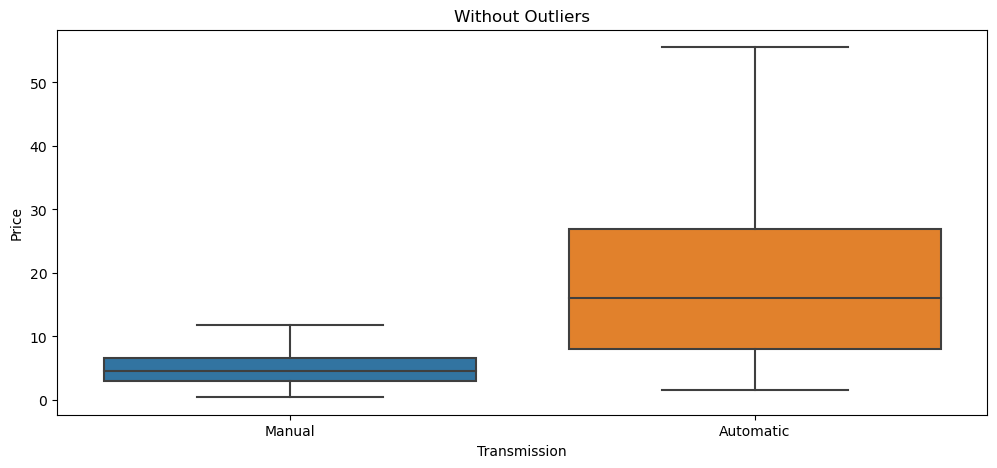

In [49]:
boxplot(df['Fuel_Type'])
boxplot(df['Owner_Type'])
boxplot(df['Year'])
boxplot(df['Seats'])
boxplot(df['Transmission']) 

**Observations and Insights for all plots:__**

1. Automatic cars are more expensive than manual.  

2. 2-seaters are the most expensive cars.  This could be that they are sports cars, which are luxury items. This is followed by 4 seater cars.  We need domain knowledge to understand why.

3. Newer cars are more pricey.  Not surprising.

4. First owner cars are more expensive.  These would tend to be newer cars.  So this also makes sense.

5. Diesel cars are more expensive than petrol.


### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [50]:
# Car name has both brand and model.  
# We extract it here,as this will help to fill missing values of price column as brand 
df['Brand'] = df['Name'].str.split(' ').str[0]  #Separating Brand name from the Name
df['Model'] = df['Name'].str.split(' ').str[1] + df['Name'].str.split(' ').str[2]

#check
df.head().T

,0,1,2,3,4
Name,Maruti Wagon R LXI CNG,Hyundai Creta 1.6 CRDi SX Option,Honda Jazz V,Maruti Ertiga VDI,Audi A4 New 2.0 TDI Multitronic
Location,Mumbai,Pune,Chennai,Chennai,Coimbatore
Year,2010,2015,2011,2012,2013
Kilometers_Driven,72000,41000,46000,87000,40670
Fuel_Type,CNG,Diesel,Petrol,Diesel,Diesel
Transmission,Manual,Manual,Manual,Manual,Automatic
Owner_Type,First,First,First,First,Second
Mileage,26.6,19.67,18.2,20.77,15.2
Engine,998.0,1582.0,1199.0,1248.0,1968.0
Power,58.16,126.2,88.7,88.76,140.8


In [51]:
# Now lets check for unique names
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [52]:
#There seems to be an issue with some unique names. 
#Isuzu and ISUZU are the same thing
#Land should be Land Rover, which has a number of models
#Mini also has a number of models
col=['ISUZU','Isuzu','Mini','Land']

#Lets take a snippet and check out our suspicions
df[df.Brand.isin(col)].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,new_price_log,Brand,Model
1259,Land Rover Freelander 2 TD4 S,Bangalore,2010,125000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,NaN,11.00,11.736069,2.397895,NaN,Land,RoverFreelander
5067,Land Rover Discovery Sport SD4 HSE Luxury 7S,Coimbatore,2019,17201,Diesel,Automatic,First,12.51,2179.0,187.70,7.0,NaN,58.91,9.752723,4.076011,NaN,Land,RoverDiscovery
718,Mini Cooper S,Pune,2012,37000,Petrol,Automatic,Second,13.60,1598.0,181.00,4.0,NaN,17.00,10.518673,2.833213,NaN,Mini,CooperS
427,Mini Cooper Convertible S,Mumbai,2014,11900,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,44.28,28.50,9.384294,3.349904,3.790533,Mini,CooperConvertible
6717,Land Rover Discovery Sport TD4 S,Kochi,2018,23342,Diesel,Automatic,First,12.83,2179.0,147.50,5.0,NaN,NaN,10.058010,NaN,NaN,Land,RoverDiscovery


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7252 non-null   object 
 1   Location               7252 non-null   object 
 2   Year                   7252 non-null   object 
 3   Kilometers_Driven      7252 non-null   int64  
 4   Fuel_Type              7252 non-null   object 
 5   Transmission           7252 non-null   object 
 6   Owner_Type             7252 non-null   object 
 7   Mileage                7250 non-null   float64
 8   Engine                 7206 non-null   float64
 9   Power                  7077 non-null   float64
 10  Seats                  7199 non-null   object 
 11  New_price              1006 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  7252 non-null   float64
 14  price_log              6018 non-null   float64
 15  new_

In [54]:
# Let's change all brandnames so that they are common in the database
df.loc[df.Brand == 'ISUZU','Brand']='Isuzu'
df.loc[df.Brand=='Mini','Brand']='Mini Cooper'
df.loc[df.Brand=='Land','Brand']='Land Rover'

In [55]:
df.Brand.nunique()

32

In [56]:
df.groupby(df.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               311
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

In [57]:
df.Model.isnull().sum()

1

In [58]:
# We notice there is one model missing from the dataset.  Let's drop that row.
df.dropna(subset=['Model'],axis=0,inplace=True)
df.Model.nunique()

726

In [59]:
#Let's examine the most popular model
df.groupby('Model')['Model'].size().nlargest(30)

Model
SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
FigoDiesel       61
Ecosport1.5      59
A42.0            56
AltoK10          56
VitaraBrezza     55
i20Asta          54
InnovaCrysta     53
i20Sportz        53
Duster110PS      51
Fortuner4x2      50
Name: Model, dtype: int64

#### **Observations and Insights: _____**

There are 32 unique brands in this dataset. Maruti and Hyundai dominate in terms of sales.
There are 726 unique models in the dataset.
The most popular brand of car is SwiftDzire, followed by Grandi10 and WagonR.

### **Missing value treatment**

In [60]:
# Now check the missing values of each column. Hint: Use isnull() method
df.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6245
Price                    1233
kilometers_driven_log       0
price_log                1233
new_price_log            6245
Brand                       0
Model                       0
dtype: int64

<AxesSubplot:>

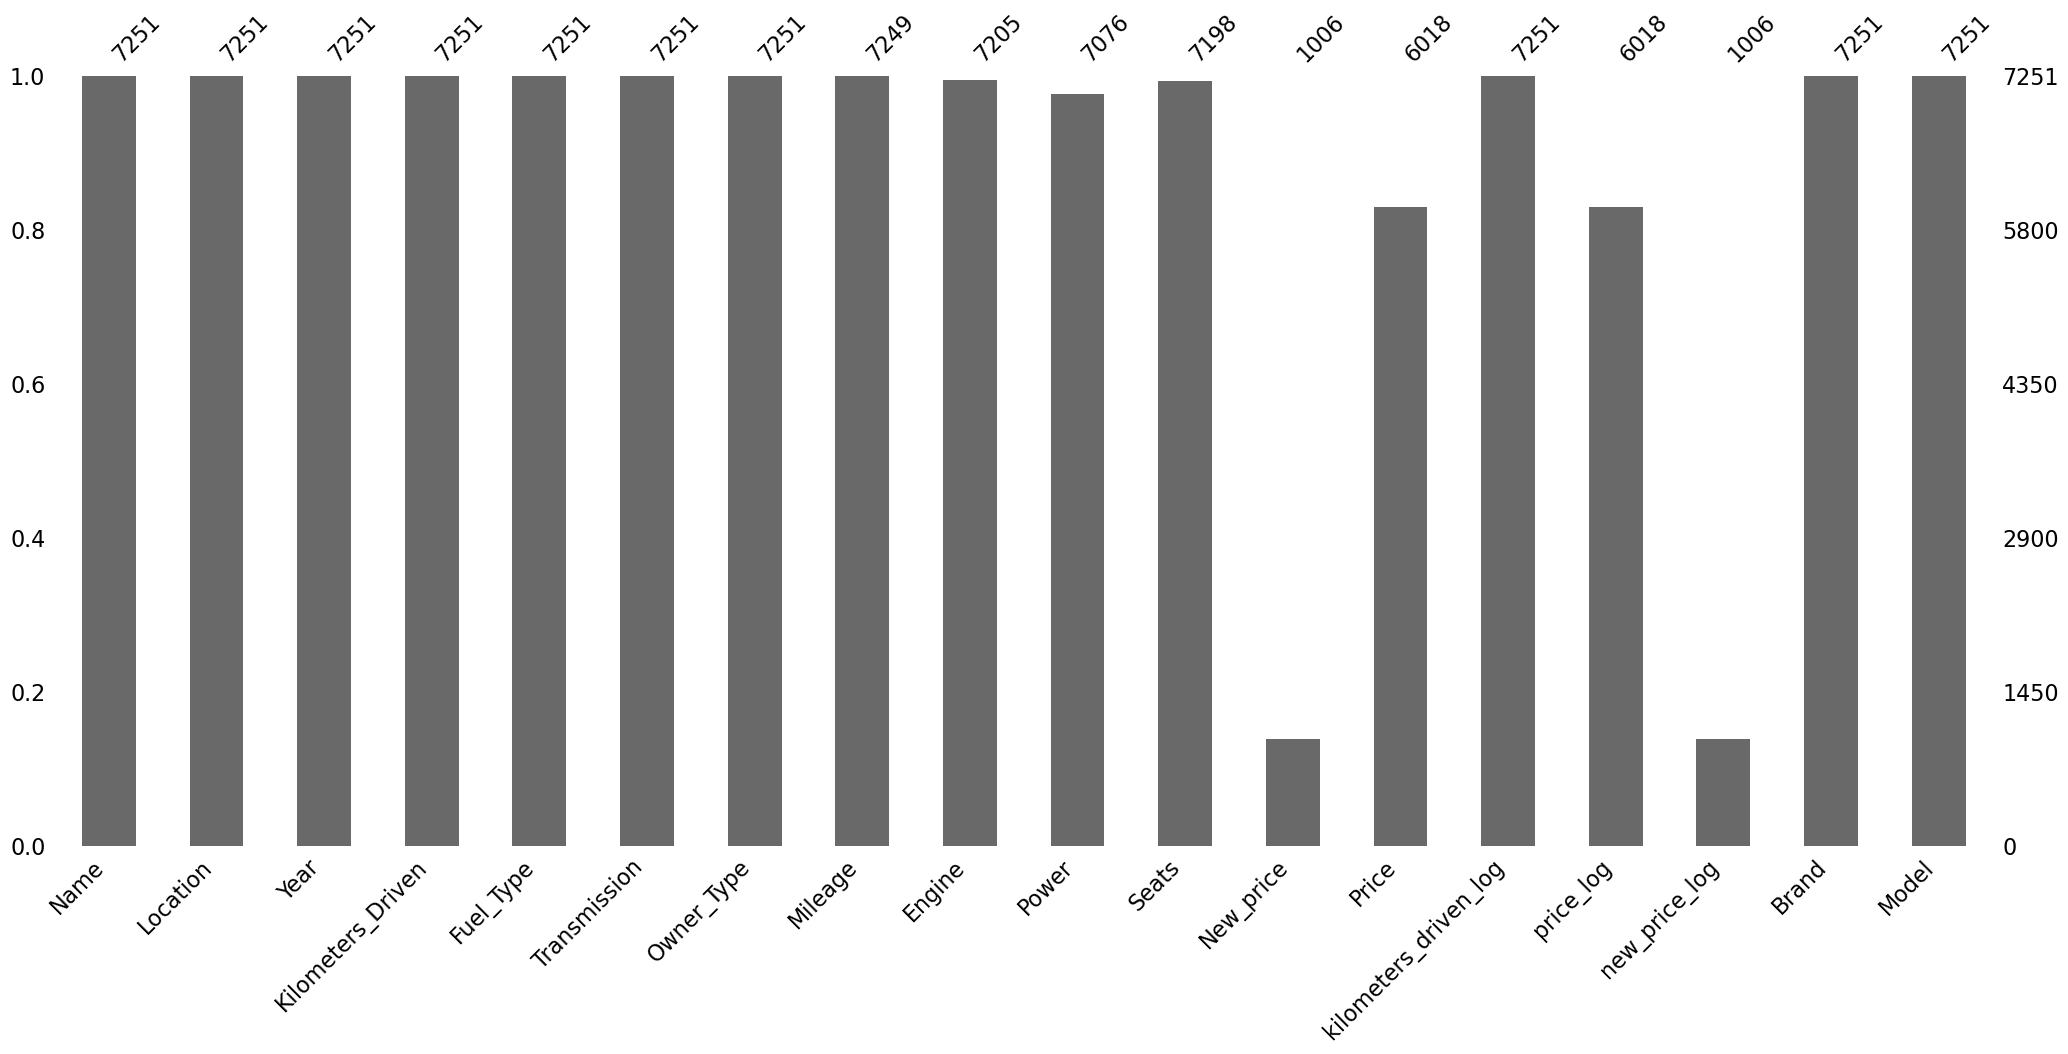

In [61]:
#Let's see this graphically
msno.bar(df)

#### **Observations and Insights: _____**

1. Lots of missing values in the dataset.  
2. Importantly, price_log has 1234 missing points. 

**Missing values in Seats**

In [62]:
# Checking missing values in the column 'Seats'

df['Seats'].isnull().sum()

53

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [63]:
#Group by Name to determine values
df['Seats']=df.groupby(['Name'])['Seats'].apply(lambda x:x.fillna(x.median()))
df['Seats'].isnull().sum()

46

In [64]:
#Now let's try grouping by Model
df['Seats']=df.groupby(['Model'])['Seats'].apply(lambda x:x.fillna(x.median()))
df['Seats'].isnull().sum()

22

In [65]:
#Let's check now which car values are missing 
df[df['Seats'].isnull()==True].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,new_price_log,Brand,Model
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,NaN,Maruti,Swift1.3
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,NaN,Maruti,Swift1.3
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,NaN,Maruti,Swift1.3
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,3.15,10.096378,1.147402,NaN,Maruti,Swift1.3
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,4.70,11.112448,1.547563,NaN,Maruti,Swift1.3
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,NaN,NaN,NaN,NaN,1.75,10.915088,0.559616,NaN,Maruti,Swift1.3
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,10.933107,0.405465,NaN,Maruti,EstiloLXI
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,4.24,10.403839,1.444563,NaN,Maruti,Swift1.3
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,NaN,NaN,2.35,11.736069,0.854415,NaN,Maruti,Swift1.3
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,NaN,NaN,NaN,NaN,11.99,10.203592,2.484073,NaN,Honda,CR-VAT


In [66]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method

df['Seats'].isnull().sum()

22

In [67]:
#Doing a Google search:  https://www.cardekho.com/maruti/swift/specs, we see that the Maruti Swift 1.3 is a 5 seater.
#Doing a Google search:  https://www.cardekho.com/overview/Maruti_Zen_Estilo/Maruti_Zen_Estilo_LXI_BS_IV.htm, is also a 5 seater
#Impute them all with 5 seats
df['Seats']=df['Seats'].fillna(5)

#Check if imputed
df['Seats'].isnull().sum()

0

**Missing values for Mileage**

In [68]:
#Let's look at how many missing values there are for Engine, Power and Mileage
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine      46
Power      175
Mileage      2
dtype: int64

In [69]:
#Let's start filling missing values by grouping Name and Year and fill in missing values
#with median.

df.groupby(['Name','Year'])['Engine'].median().head(30)
df['Engine']=df.groupby(['Name','Year'])['Engine'].apply(lambda x:x.fillna(x.median()))
df['Power']=df.groupby(['Name','Year'])['Power'].apply(lambda x:x.fillna(x.median()))
df['Mileage']=df.groupby(['Name','Year'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [70]:
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine      45
Power      162
Mileage      2
dtype: int64

In [71]:
#Let's look at each unique combination of Brand and Model and display the top 10 results.

df.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova    1489.0
Audi        A335           1968.0
            A41.8          1781.0
            A42.0          1968.0
            A43.0          2967.0
            A43.2          3197.0
            A430           1395.0
            A435           1968.0
            A4New          1968.0
            A62.0          1968.0
Name: Engine, dtype: float64

In [72]:
# Now check missing values of each column. Hint: Use isnull() method
df.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     45
Power                     162
Seats                       0
New_price                6245
Price                    1233
kilometers_driven_log       0
price_log                1233
new_price_log            6245
Brand                       0
Model                       0
dtype: int64

In [73]:
# Impute missing Mileage. For example, use can use median or any other methods.
# This was treated above.
df['Mileage'].isnull().sum()

2

In [74]:
#Since this is 2 records, we can drop them
df.dropna(subset=['Mileage'],axis=0,inplace=True)
df.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                     45
Power                     162
Seats                       0
New_price                6244
Price                    1233
kilometers_driven_log       0
price_log                1233
new_price_log            6244
Brand                       0
Model                       0
dtype: int64

**Missing values for Engine**

In [75]:
df['Engine'].isnull().sum()

45

In [76]:
#Let's look at median, mean and max for Engine to see if we can impute with one of these values.

df.groupby(['Model','Year'])['Engine'].agg({'median','mean','max'}).sort_values(by='Model',ascending=True).head(10)

max         mean  median
Model   Year                             
1000AC  1998   970.0   970.000000   970.0
1Series 2013  1995.0  1995.000000  1995.0
        2015  1995.0  1995.000000  1995.0
370ZAT  2012  3696.0  3696.000000  3696.0
3Series 2018  1995.0  1995.000000  1995.0
        2017  1995.0  1995.000000  1995.0
        2016  1995.0  1995.000000  1995.0
        2015  1995.0  1995.000000  1995.0
        2014  2993.0  2078.166667  1995.0
        2013  2993.0  2066.428571  1995.0

In [77]:
df.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                     45
Power                     162
Seats                       0
New_price                6244
Price                    1233
kilometers_driven_log       0
price_log                1233
new_price_log            6244
Brand                       0
Model                       0
dtype: int64

In [78]:
#Let's impute these records with median=1995

cols1 = ["Engine"]

for ii in cols1:
    df[ii] = df[ii].fillna(df[ii].median())

In [79]:
#Check if imputed
df['Engine'].isnull().sum()

0

**Missing values for Power**

In [80]:
df['Power'].isnull().sum()

162

In [81]:
df.groupby(['Model','Year'])['Power'].agg({'median','mean','max'}).sort_values(by='Model',ascending=True).head(10)

max        mean  median
Model   Year                           
1000AC  1998    NaN         NaN     NaN
1Series 2013  143.0  143.000000   143.0
        2015  143.0  143.000000   143.0
370ZAT  2012  328.5  328.500000   328.5
3Series 2018  190.0  188.000000   190.0
        2017  190.0  188.820000   190.0
        2016  190.0  189.333333   190.0
        2015  190.0  185.981429   184.0
        2014  245.0  189.666667   184.0
        2013  245.0  191.785714   184.0

In [82]:
cols1 = ['Power']

for ii in cols1:
    df[ii] = df[ii].fillna(df[ii].median())

In [83]:
df['Power'].isnull().sum()

0

**Missing values for New_price**

In [84]:
df['New_price'].isnull().sum()

6244

In [85]:
df['New_price']=df.groupby(['Name','Year'])['New_price'].apply(lambda x:x.fillna(x.median()))
df['New_price'].isnull().sum()

6136

In [86]:
df['New_price']=df.groupby(['Name'])['New_price'].apply(lambda x:x.fillna(x.median()))
df['New_price'].isnull().sum()

6017

In [87]:
df['New_price']=df.groupby(['Brand','Model'])['New_price'].apply(lambda x:x.fillna(x.median()))
df['New_price'].isnull().sum()

4576

In [88]:
df['New_price']=df.groupby(['Brand'])['New_price'].apply(lambda x:x.fillna(x.median()))
df['New_price'].isnull().sum()

158

In [89]:
df.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                 158
Price                    1233
kilometers_driven_log       0
price_log                1233
new_price_log            6244
Brand                       0
Model                       0
dtype: int64

In [90]:
#We will drop the records with New_price.
#We will also drop records of the target variable Price so as not to introduce bias.

df.drop(columns=["new_price_log"], inplace = True, axis = 1)
df.shape


#Check

df_new=pd.DataFrame()
#df_new=df.copy()
#df_new.isnull().sum()

In [91]:
df_new=pd.DataFrame()
df_new=df.copy()
df_new.dropna(subset=['New_price'], inplace=True)
df_new.shape
df_new.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1202
kilometers_driven_log       0
price_log                1202
Brand                       0
Model                       0
dtype: int64

In [92]:
df_new = df_new[(df_new["Price"].notna()) & (df_new["New_price"].notna())]

In [93]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5889 entries, 0 to 6017
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   5889 non-null   object 
 1   Location               5889 non-null   object 
 2   Year                   5889 non-null   object 
 3   Kilometers_Driven      5889 non-null   int64  
 4   Fuel_Type              5889 non-null   object 
 5   Transmission           5889 non-null   object 
 6   Owner_Type             5889 non-null   object 
 7   Mileage                5889 non-null   float64
 8   Engine                 5889 non-null   float64
 9   Power                  5889 non-null   float64
 10  Seats                  5889 non-null   float64
 11  New_price              5889 non-null   float64
 12  Price                  5889 non-null   float64
 13  kilometers_driven_log  5889 non-null   float64
 14  price_log              5889 non-null   float64
 15  Bran

In [1]:
df_new = df_new[(df_new["new_price_log"].notna())]
df_new.isnull().sum()

NameError: name 'df_new' is not defined

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

**Observations for missing values after imputing: _____**

1.  There are a significant number of missing values for New_price.  We have imputed them here;  however because there are so many, the column should be dropped.



## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

POTENTIAL TECHNIQUES

There is no strict sequence that we must absolutely follow when applying machine learning techniques to a problem.  However, there are some general guidelines that can be used to guide the process:

1. We need to ensure that the data is clean.  We did a lot of the work in this Milestonewhere we did EDA, univariate analysis on numerical and categorial data, bivariate data using scatterplots, box plots and heat map. We also did feature engineering where we imputed missing values.

2. First we need to understand the problem that we are trying to solve and the type data we are working with, as well as the type of outcome we want to predict.  In our situation, we are predicting a price, therefore the final method should provide a single value.

3. We will start with a simple technique - linear regression or decision trees, which is easy to understand and interpret. This will provide a baseline for performance and a starting point for further experimentation.

4. Next, we can try ensemble methods like Random Forest which can possibly improve performance and reduce overfitting compared to individual decision trees.

5. In case we are overfitting, we can use regularization techniques like Ridge or Lasso regression.  This can also be used to improve the performance and generalization of the model.

6. We could try more complex methods if the performance of the simpler techniques is not satisfactory  such as neural networks.  But this is unlikely since this is the Machine Learning capstone.

7. Finally, we need to evaluate the performance of the different techniques using appropriate metrics, such as accuracy or mean squared error. Select the technique that performs best on our specific problem.

OVERALL SOLUTION DESIGN

We will use the following process for the design of our solution:

1. EDA:  examine summary statistics on numerical and categorical values to understand the data. This is actually an important step in which a deep understanding of the definiton of each variable is considered.

2. Perform univariate analysis on numerical and categorial data to understand the shape of each variable and to ensure that the distributions are normal.  If not normal, then perform log transformation.

3. Perform bivariate data using scatterplots, bos plots and heat map to discover the relationships between the variables.

4. Perform feature engineering where missing values are discovered and imputed.

5. Clean the data and prepare it for linear regression.

6. Separate the dependent and independt variables, and then split the data into training and test.

5. Looking ahead to Milestone 2, we will build our supervised learning models:  1) Linear Regression, 2) Ridge/Lasso Regression, 3) Decision Trees, 4) Random Forest

6. We will refine our insights to uncover the most meaningful insights relevent to the problem.

7. We will provide a comparison of the various techniques and their relative performance.  That is, we will determine how they performed, which one is better relative to others, is there scope for improvement.

8. Finally, we will make a proposal as to which model should be adoped.  We will stipulate why this is the best solution For Cars4U to adopt.

MEASURES OF SUCCESS

We can provide some general guidelines for interpreting some of the most commonly used metrics for success, but it will depend on what we find in the various models

1. Mean Absolute Error (MAE): A smaller value for MAE indicates a better fit of the model to the data. A value of 0 would indicate a perfect fit. 

2. Mean Squared Error (MSE): Similar to MAE, a smaller value for MSE indicates a better fit of the model to the data. A value of 0 would indicate a perfect fit.

3. Root Mean Squared Error (RMSE): Similar to MSE, a smaller value for RMSE indicates a better fit of the model to the data. A value of 0 would indicate a perfect fit.

4. R-squared: This metric ranges from 0 to 1, with 1 indicating a perfect fit of the model to the data. Values close to 1 indicate a good fit, while values close to 0 indicate a poor fit.

5. Accuracy: This metric ranges from 0 to 1, with 1 indicating that all instances were correctly classified. A value of 0.8 or higher is often considered good, but again it depends on the problem and the cost of false positives and false negatives.

6. Precision: This metric ranges from 0 to 1, with 1 indicating that all positive predictions were correct. A value of 0.8 or higher is often considered good.

7. Recall: This metric ranges from 0 to 1, with 1 indicating that all actual positive instances were correctly identified. A value of 0.8 or higher is often considered good.

8. F1-score: This metric ranges from 0 to 1, with 1 indicating a perfect balance of precision and recall. A value of 0.8 or higher is often considered good.

9. ROC AUC: This metric ranges from 0 to 1, with 1 indicating a perfect classification model. A value of 0.8 or higher is often considered good.


### **Saving the Data**

Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

To save the pre-processed data frame, please follow the below lines of code:

In [ ]:
# Assume df_cleaned is the pre-processed data frame in your code, then
df_cleaned=df
df_cleaned.to_csv("cars_data_updated.csv", index = False)

The above code helps to save the cleaned/pre-processed dataset into csv file, that can be further loaded into Milestone2.